# Business Case: Aerofit

## Importing Libraries

In [674]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


sns.set_style('darkgrid')
sns.set_palette('Set3')
# plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.facecolor'] = 'none'

## Loading Dataset

In [675]:
path="./Data/erofit_treadmill.csv"
aerofit = pd.read_csv(path)

## Data Exploration

In [676]:
# First 10 values

aerofit.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [677]:
# Last 10 values

aerofit.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [678]:
# Shape of the dataset

aerofit.shape

(180, 9)

In [679]:
# Type of data in dataframe

aerofit.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [680]:
# Datasets information

aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


*Observation:*
*  There are **180 rows and 9 columns** in dataset and all are **non-null values.**
*  Product,Gender and Martial status are object datatype .
*  While Age, Education,Usage,Fitness,Income,Miles are integer datatype.

#### Statistical Summary & Unique values

In [681]:
# Count of unique features for each features

aerofit.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [682]:
# All unique value for each features

def findUniqueValue(df,features):
    n = len(features)
    for feature in range(n):
        print(f"{features[feature]}:{df[features[feature]].sort_values().unique()}")
        print('-'*50)

feature_name = aerofit.columns.to_list()
findUniqueValue(aerofit,feature_name)

Product:['KP281' 'KP481' 'KP781']
--------------------------------------------------
Age:[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 50]
--------------------------------------------------
Gender:['Female' 'Male']
--------------------------------------------------
Education:[12 13 14 15 16 18 20 21]
--------------------------------------------------
MaritalStatus:['Partnered' 'Single']
--------------------------------------------------
Usage:[2 3 4 5 6 7]
--------------------------------------------------
Fitness:[1 2 3 4 5]
--------------------------------------------------
Income:[ 29562  30699  31836  32973  34110  35247  36384  37521  38658  39795
  40932  42069  43206  44343  45480  46617  47754  48556  48658  48891
  49801  50028  51165  52290  52291  52302  53439  53536  54576  54781
  55713  56850  57271  57987  58516  59124  60261  61006  61398  62251
  62535  64741  64809  65220  67083  68220  69721  70966  74701  75946
  7719

In [683]:
# Statistical Summary

aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


*  Customer Age lie between 18 to 50., with an average of 29 years and median of 26 years.
*  Customer education lie between 12 -21 years, with average and median of 16 years and maximum of 21 years.
*  Expected Treadmill usage is atleast 2 times a week , maximum is 7 times a week and on Average 3 times a week.
*  Fitness rate is range betwwen 1-5. 1 is low and 5 is high. Average fitness rate  is 3 and median is 3.
*  Maximum income of treadmill user is 100K ,minimum income is 29K, Average income approx. 54K ,while median is is approx. 51K.
*  Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.

## Data Preprocessing

In [684]:
# changing it to  object dtype to category  to save memory : Product,Gender and Martial status

aerofit['Product'] = aerofit['Product'].astype('category')
aerofit['Gender'] = aerofit['Gender'].astype('category')
aerofit['MaritalStatus'] = aerofit['MaritalStatus'].astype('category')

aerofit.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [685]:
# Missing value ?

aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

*Observation:*
*  No Missing value found.

#### Outlier Dection

In [686]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


*Observation:*
* > Scaling variable with mean in 3 stage:
    

In [687]:
# Three different variable groups 

aerofit_low = aerofit[['Usage', 'Fitness']] # Low
aerofit_medium = aerofit[['Age', 'Education']]  # Medium
aerofit_high = aerofit[['Miles']]  # High
aerofit_extreme = aerofit[['Income']]  # Extreme

In [688]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss


In [689]:
def detect_outlier(df,title):
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, orient="h", palette="Set3")
    plt.title(f'{title} Outliers',fontsize=20,color='#8a8d93',family="Calibri")
    plt.xticks(rotation=45,size=14)
    plt.yticks(rotation=45,size=14)
    plt.xlabel('Data Points',fontsize=18,color='#8a8d93',family="Calibri")
    plt.ylabel('Feature',fontsize=18,color='#8a8d93',family="Calibri")
    plt.show()
    print('-'*50)
    columns_lst = df.columns.to_list()
    for i in columns_lst:
        # Lets take a closer look to Each Features
        plt.figure(figsize=(12,8))
        sns.boxplot(data=aerofit,x=i)
        plt.title(f'{i} Outliers',fontsize=20,color='#8a8d93',family="Calibri")
        plt.xticks(rotation=45,size=14)
        plt.yticks(rotation=45,size=14)
        plt.xlabel('Data Points',fontsize=18,color='#8a8d93',family="Calibri")
        plt.xlabel(f'{i}')
        plt.show()
        probable_outliers_tm, possible_outliers_tm = tukeys_method(df, i)
        print(f"probable outliers: {probable_outliers_tm}")
        print(f"possible outliers: {possible_outliers_tm}")

        print('-'*50)
        
        #Transform 'CRIM' to log 
        log_features = np.log(df[i])
        df[f'{i}_log'] = df[i]+1
        log_features = np.log(df[f'{i}_log'])
        df[f'{i}_log1'] = log_features

        #Plot
        plt.figure(figsize=(12,8))
        sns.distplot(df[f'{i}_log1'])
        plt.title(f'{i} log Outliers',fontsize=20,color='#8a8d93',family="Calibri")
        plt.xticks(rotation=45,size=14)
        plt.yticks(rotation=45,size=14)
        # plt.xlabel('Data Points',fontsize=18,color='#8a8d93',family="Calibri")
        plt.ylabel('Density',fontsize=18,color='#8a8d93',family="Calibri")
        plt.plot()

        #Calculate probable and possible outliers using log-iq method
        probable_outliers_logiq, possible_outliers_logiq = tukeys_method(df, f'{i}_log1')
        print(f"probable outliers logiq: {probable_outliers_logiq}")
        print(f"possible outliers logiq: {possible_outliers_logiq}")

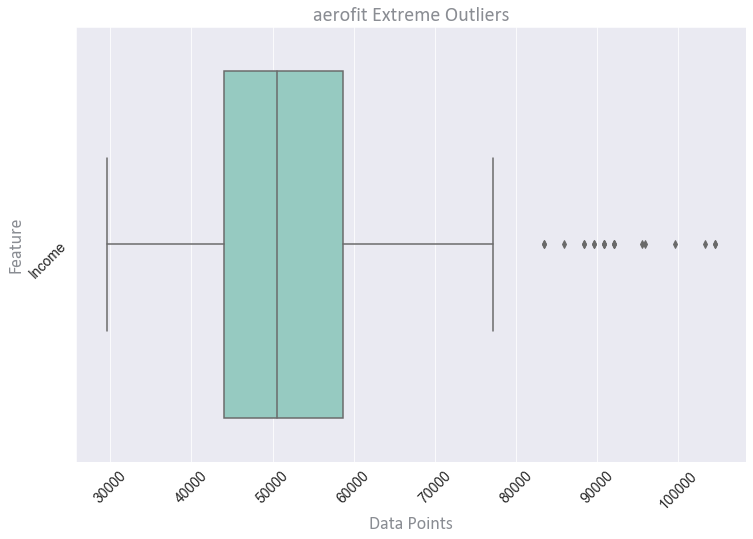

--------------------------------------------------


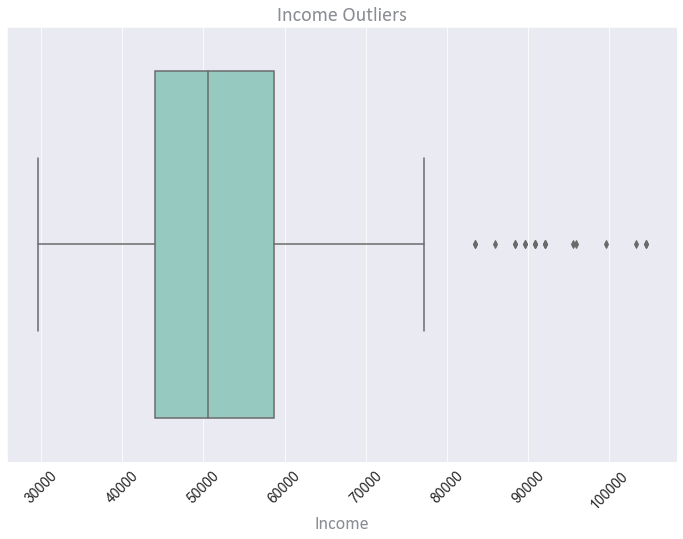

probable outliers: [168, 174, 178]
possible outliers: [159, 160, 161, 162, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]
--------------------------------------------------
probable outliers logiq: []
possible outliers logiq: [161, 162, 167, 168, 169, 171, 172, 173, 174, 177, 178, 179]


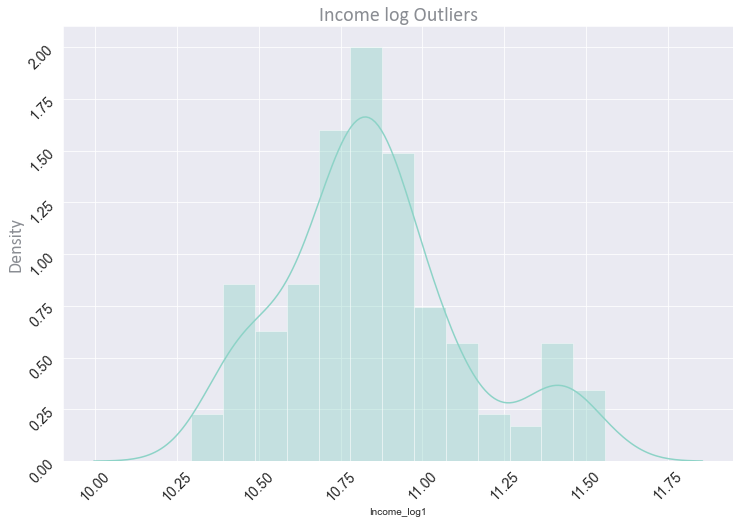

In [690]:
detect_outlier(aerofit_extreme,'aerofit Extreme')

* *Observation:*
    * Income have most outliers.
    * Income have outliers exits after $80K.

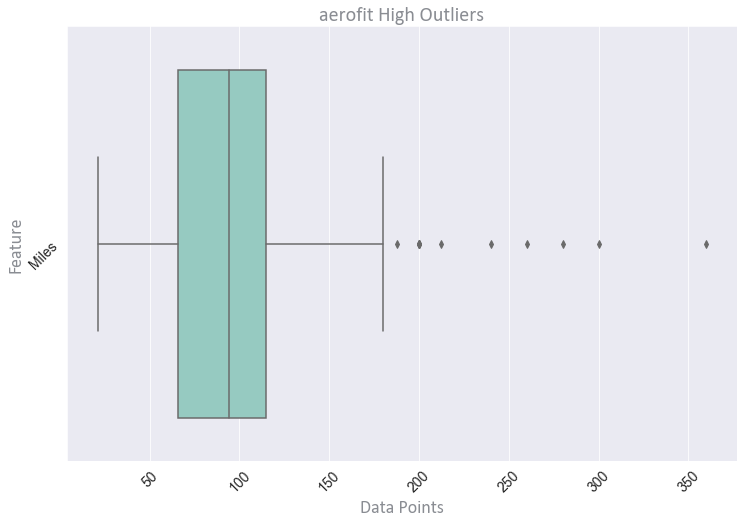

--------------------------------------------------


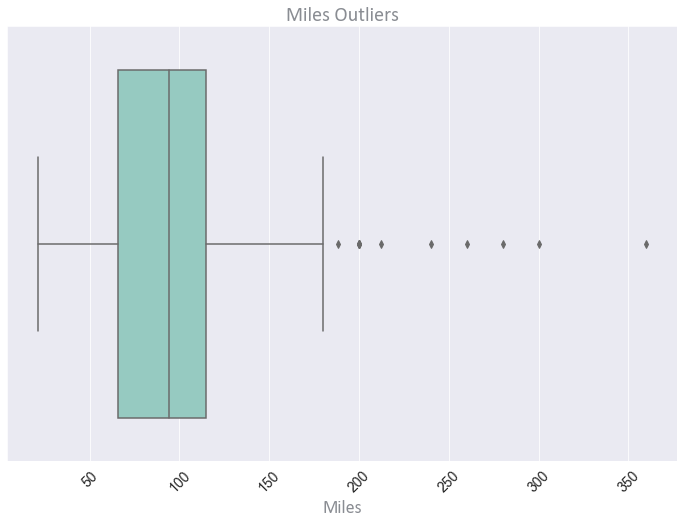

probable outliers: [166, 167, 173]
possible outliers: [23, 84, 142, 148, 152, 155, 166, 167, 170, 171, 173, 175, 176]
--------------------------------------------------
probable outliers logiq: []
possible outliers logiq: [117, 166, 167, 173]


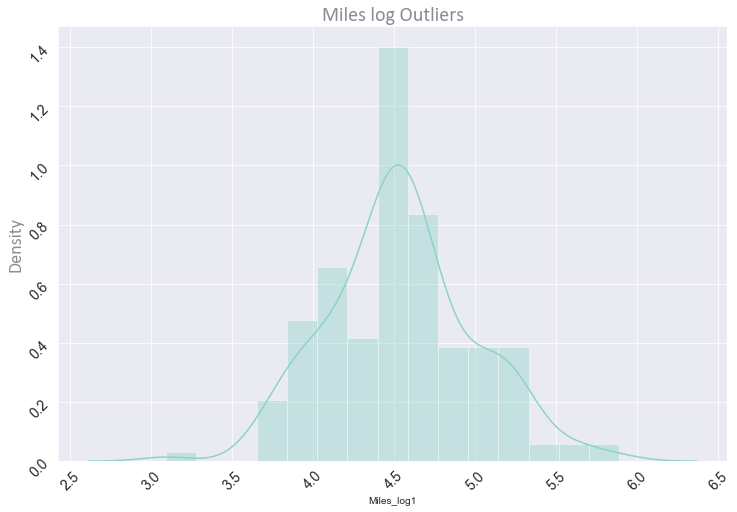

In [691]:
detect_outlier(aerofit_high,'aerofit High')

* *Observation:*
    * Miles have also outliers but less outliers than Income.
    * Miles have outliers exits after 185 Miles / week.

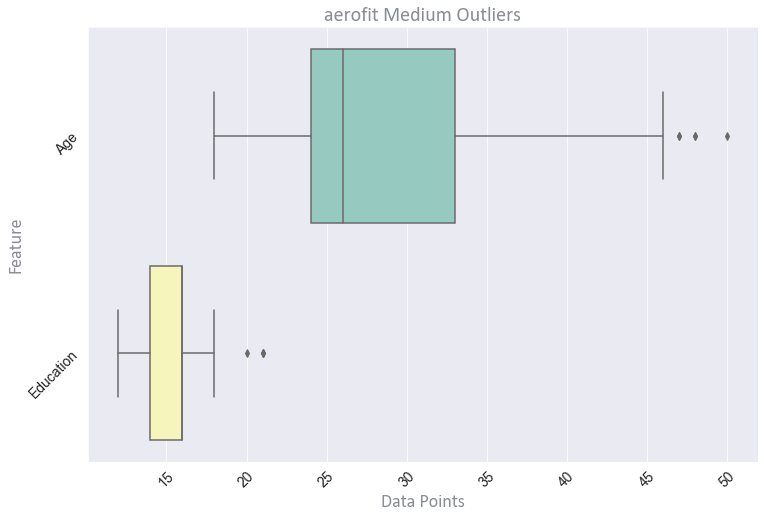

--------------------------------------------------


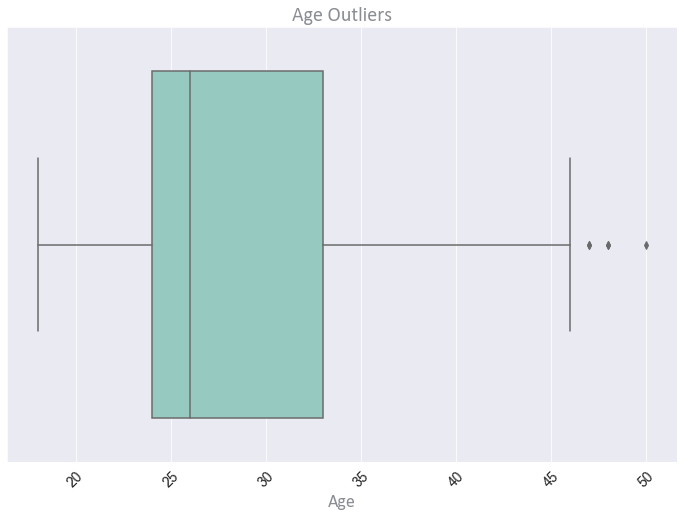

probable outliers: []
possible outliers: [78, 79, 139, 178, 179]
--------------------------------------------------
probable outliers logiq: []
possible outliers logiq: []


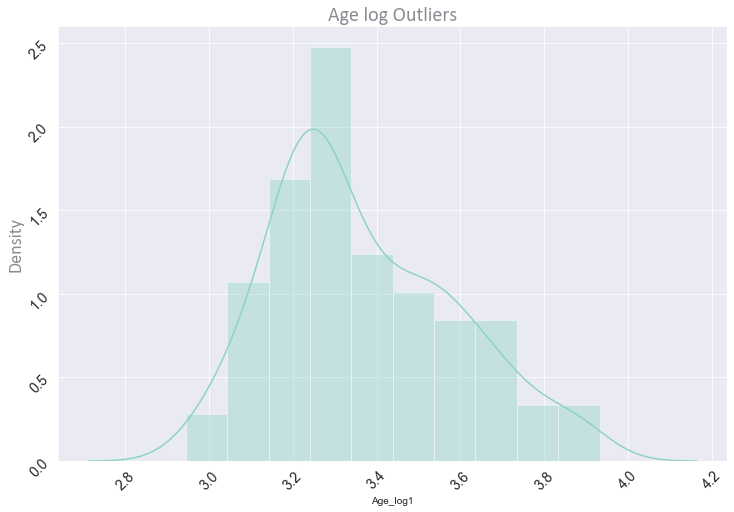

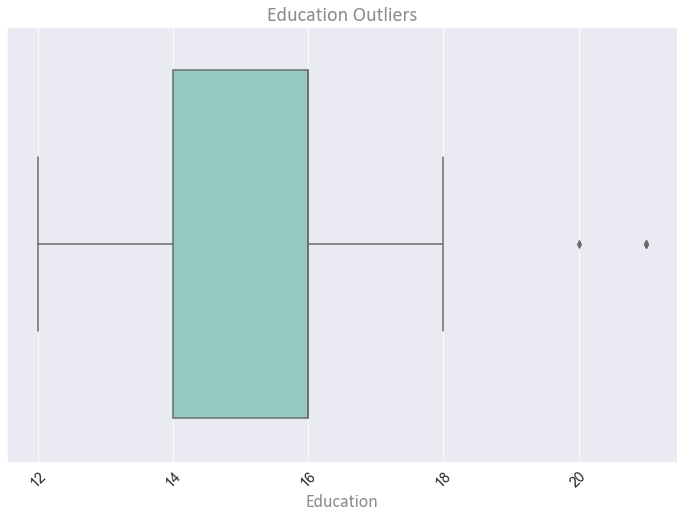

probable outliers: []
possible outliers: [156, 157, 161, 175]
--------------------------------------------------
probable outliers logiq: []
possible outliers logiq: [156, 157, 161, 175]


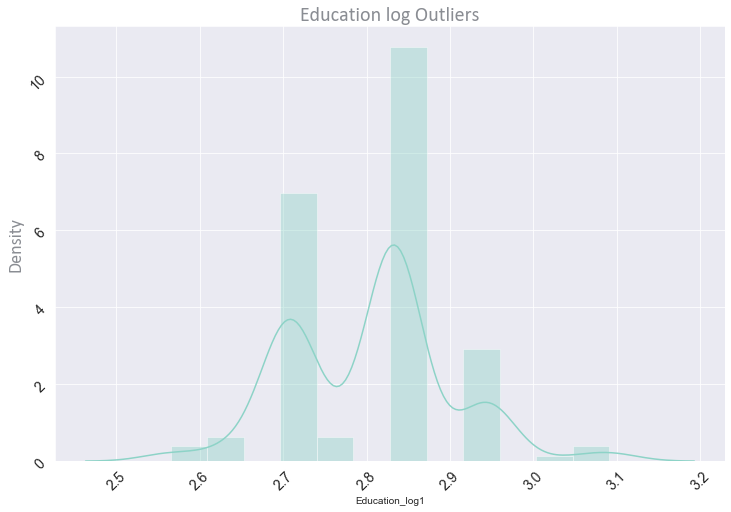

In [692]:
detect_outlier(aerofit_medium,'aerofit Medium')

* *Observation:*
    * Age and Education have medium outliers as less than Miles.
    * Age have outliers exits after 47 years,
    * Education have outliers exits after 20 years.

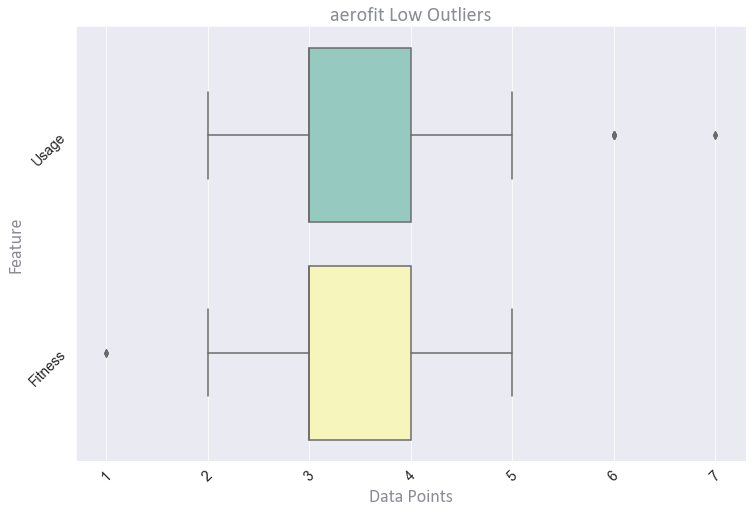

--------------------------------------------------


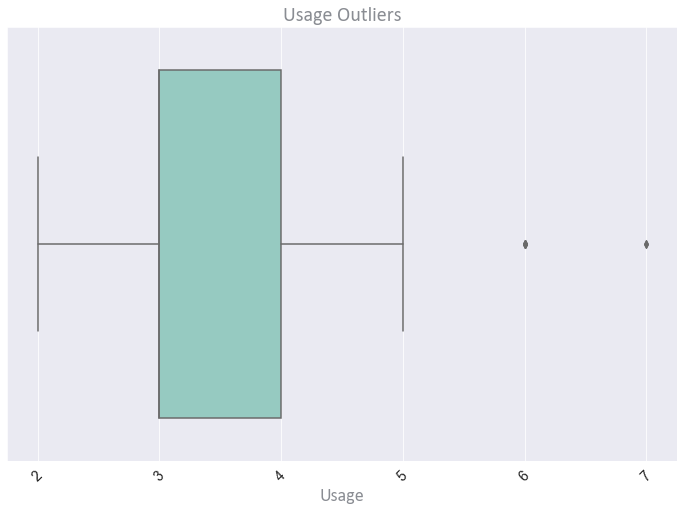

probable outliers: [163, 166]
possible outliers: [154, 155, 162, 163, 164, 166, 167, 170, 175]
--------------------------------------------------
probable outliers logiq: []
possible outliers logiq: [154, 155, 162, 163, 164, 166, 167, 170, 175]


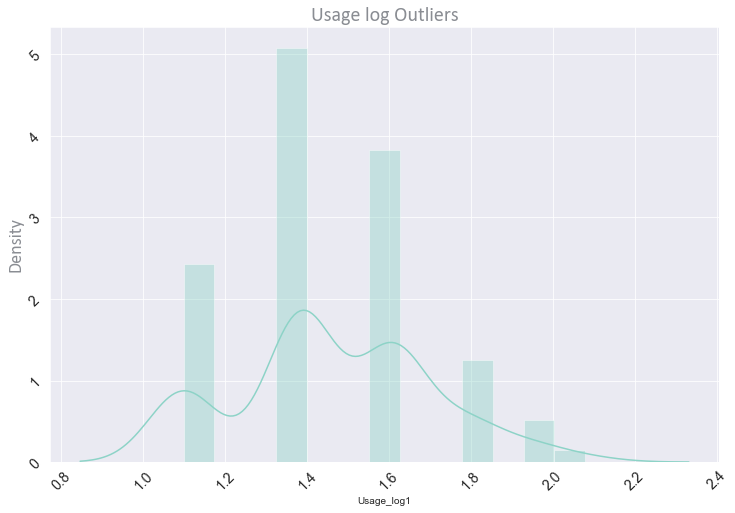

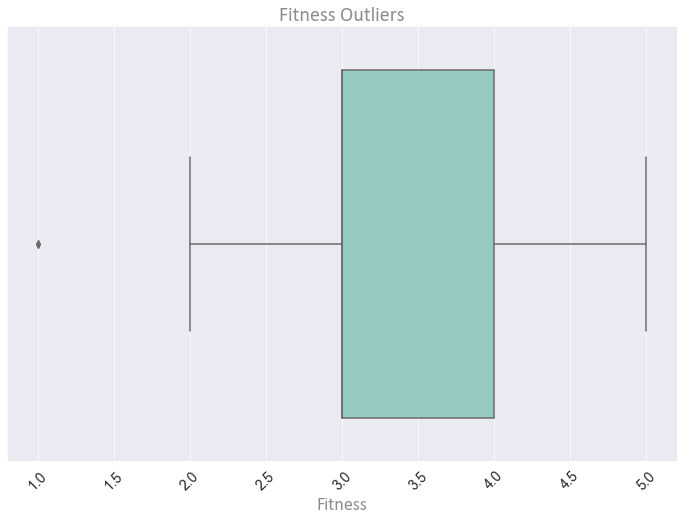

probable outliers: []
possible outliers: [14, 117]
--------------------------------------------------
probable outliers logiq: [14, 117]
possible outliers logiq: [14, 117]


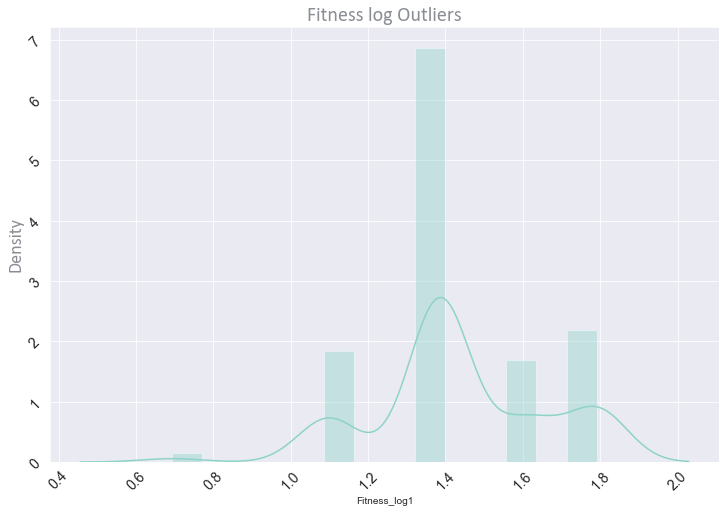

In [693]:
detect_outlier(aerofit_low,'aerofit Low')

* *Observation:*
    * Usage and Fitness have low outliers as less than Age & Education.
    * Usage have outliers exits at 6-7 days in a week.
    * Fitness have outliers exits 1 rate fitness.

## EDA

#### Univariate Analysis : Non-Visual & Visual

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


<Figure size 288x144 with 0 Axes>

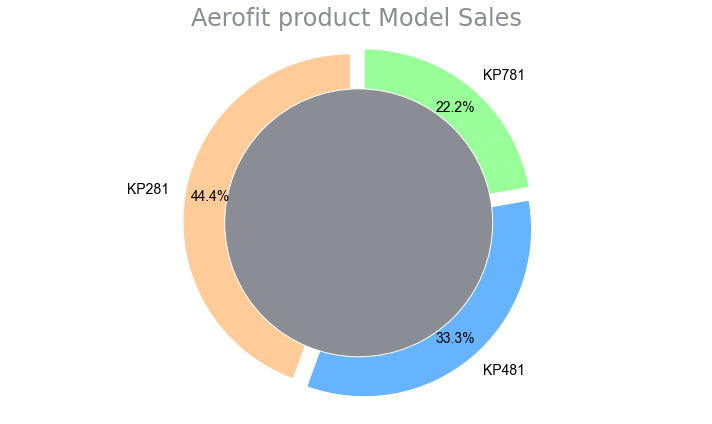

In [694]:
# Sales percentage aerofit product Model ?

def donut_perc(df,feature,title):
    index = df[feature].value_counts().index
    data = df[feature].value_counts()
    print(data)
    
    plt.figure(figsize=(4,2))
    fig1, ax1 = plt.subplots(figsize=(10,6))
    explode = (0.05,0.05,0.05)
    colors = ['#ffcc99','#66b3ff','#99ff99']
    ax1.pie(data,autopct='%1.1f%%',explode=explode,labels=index,colors=colors,pctdistance=0.85,startangle=90,textprops={'fontsize': 14,'color':'black'})
    plt.title(title,fontsize=24,color='#8a8d93',family="'Bebas Neue', cursive")
    # plt.xticks(rotation=45,size=12)
    # plt.yticks(rotation=45,size=12)
    # plt.labels(index,fontsize=16,color='#8a8d93',family="'Bebas Neue', cursive")
    

    #draw circle
    centre_circle = plt.Circle((0,0),0.8,fc='#8a8d93')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')
    plt.tight_layout()
    plt.show()

donut_perc(aerofit,'Product','Aerofit product Model Sales')

*Observation:*
* 44.4% customers brought KP281.
* 33.3% customers brought KP481.
* 22.2% customers brought KP781.
* Most sold Model is KP281 with sale of 44.4%.

Male      104
Female     76
Name: Gender, dtype: int64


<Figure size 288x144 with 0 Axes>

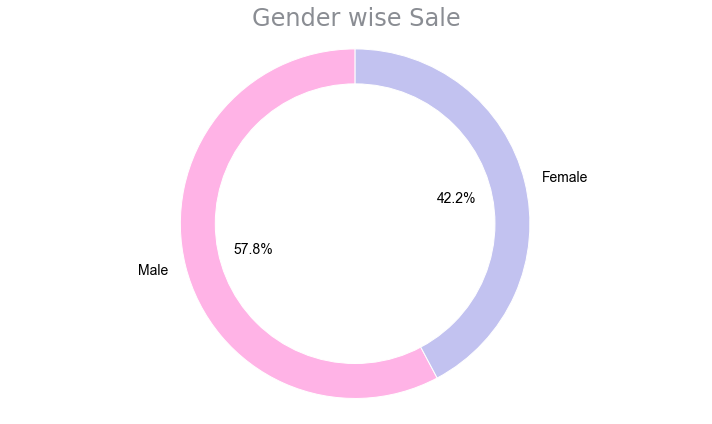

In [695]:
# Gender Wise Sale

def donut_perc(df,feature,title):
    index = df[feature].value_counts().index
    data = df[feature].value_counts()
    print(data)
    
    plt.figure(figsize=(4,2))
    fig1, ax1 = plt.subplots(figsize=(10,6))
    colors = ['#ffb3e6','#c2c2f0']
    ax1.pie(data,autopct='%1.1f%%',labels=index,colors=colors,startangle=90,textprops={'fontsize': 14,'color':'black'})
    plt.title(title,fontsize=24,color='#8a8d93',family="'Bebas Neue', cursive")
    

    #draw circle
    centre_circle = plt.Circle((0,0),0.8,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')
    plt.tight_layout()
    plt.show()
donut_perc(aerofit,'Gender','Gender wise Sale')

*Observation:*
* 104 Male customer buying traedmills while only 76 Female customer buying treadmils
* 57.8% of product was bought by male and 42.2% of product bought by Female.

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


<Figure size 288x144 with 0 Axes>

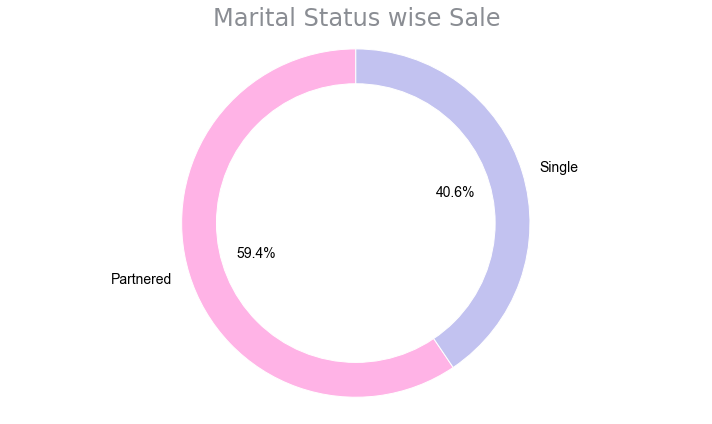

In [696]:
# MaritalStatus Wise Sale


def donut_perc(df,feature,title):
    index = df[feature].value_counts().index
    data = df[feature].value_counts()
    print(data)
    
    plt.figure(figsize=(4,2))
    fig1, ax1 = plt.subplots(figsize=(10,6))
    colors = ['#ffb3e6','#c2c2f0']
    ax1.pie(data,autopct='%1.1f%%',labels=index,colors=colors,startangle=90,textprops={'fontsize': 14,'color':'black'})
    plt.title(title,fontsize=24,color='#8a8d93',family="'Bebas Neue', cursive")
    

    #draw circle
    centre_circle = plt.Circle((0,0),0.8,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')
    plt.tight_layout()
    plt.show()
donut_perc(aerofit,'MaritalStatus','Marital Status wise Sale')

* Out of 180 product, 107 product was bought by Customer who is married.
* Out of 180 product, 73 product was bought by Customer who is Not married.
* 59.4% Sale comes from maried Customer whereas 40.6% sale comes from non-married customer.

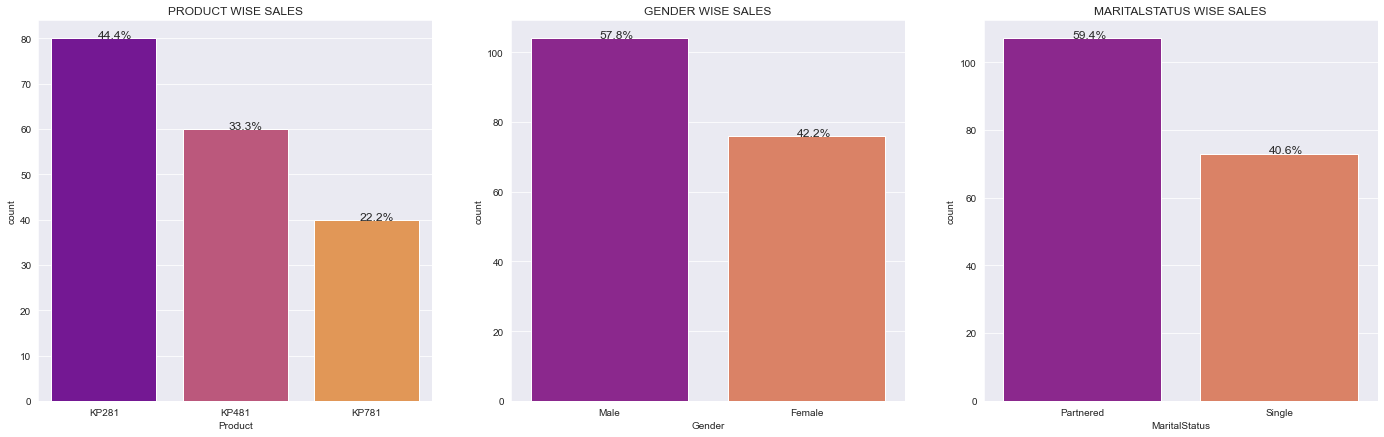

In [697]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage


fig1, axes1 =plt.subplots(1,3,figsize=(24, 7))
list_col=['Product','Gender','MaritalStatus']
j=0
for i in range(len(list_col)):
    order = aerofit[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis = sns.countplot(x=list_col[i], data=aerofit, order=order, ax=axes1[i], palette='plasma').set(title=f'{list_col[i].upper()} WISE SALES')
    bar_perc(axes1[i],aerofit[list_col[i]])

In [698]:
aerofit[aerofit['Product']=='KP281'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


*Observation:*
* 80 customers bought KP281 model.
* Average age of customer who purchases KP281 is 28.5 , Median is 26 . Data is right skewed.Customer range is between 23-33.
* Average Education is 15 and median is 16.
* Expected usage is 3 day a week.
* Self rated fitness is 3 that is average fitness level.
* Average income and median is around $46K.
* Expected Miles to run is on an Average 82.78 miles per week and median is 85 miles per week.

In [699]:
aerofit[aerofit['Product']=='KP481'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


*Observation:*
* 60 customers bought KP481 model.
* Average age of customer who purchases KP481 is 28.9 , Median is 26 . Data is right skewed.Customer range is between 24-33.
* Average Education is 15 and median is 16.
* Expected usage is 3 day a week.
* Self rated fitness is 3 that is average fitness level
* Average income and median is around $49K.
* Expected Miles to run is on an Average 87.93 miles per week and median is 85 miles per week.


In [700]:
aerofit[aerofit['Product']=='KP781'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


*Observation:*
* 40 customers bought KP781 model.
* Average age of customer who purchases KP781 is 29 , Median is 27. Customer range is between 24-30.
* Average Education is 17 and median is 18.
* Expected usage is 4-5 day a week.
* Self rated fitness is 4-5 that is Good fitness level.
* Average income and median is around $75K.
* Expected Miles to run is on an Average 167 miles per week and median is 160 miles per week.

In [701]:

def data_distribution(data):
   data_name = data.name.upper()
   data_mean = data.mean()
   data_median = data.median()
   data_mode =  data.mode()[0]
   return data_name,data_mean,data_median,data_mode


def dist_box_violin(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
   data_name,data_mean,data_median,data_mode = data_distribution(data)

   fig, axes =plt.subplots(1,3,figsize=(17, 7))
   fig.suptitle(f"SPREAD OF DATA FOR {data_name}", fontsize=18, fontweight='bold')
   sns.distplot(data,kde=False,color='Blue',ax=axes[0])
   axes[0].axvline(data_mean, color='y', linestyle='--',linewidth=2)
   axes[0].axvline(data_median, color='r', linestyle='dashed', linewidth=2)
   axes[0].axvline(data_mode,color='g',linestyle='solid',linewidth=2)
   axes[0].legend({'Mean':data_mean,'Median':data_median,'Mode':data_mode})

   sns.boxplot(x=data,showmeans=True, orient='h',color="purple",ax=axes[1])

   sns.violinplot(data,ax=axes[2],showmeans=True)

Average AGE: 29
Median AGE: 26
Mode AGE: 25
--------------------------------------------------
count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64


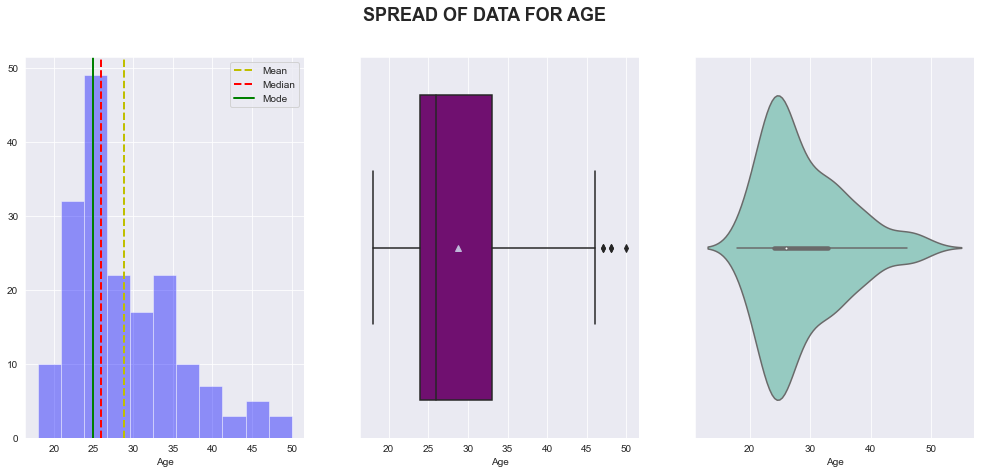

In [702]:
# Customer Age distribution
import math
def age_distribution(data):
    data_name,data_mean,data_median,data_mode = data_distribution(data)
    data_mean =  math.ceil(data_mean)
    data_median = math.ceil(data_median)
    data_mode = (math.ceil(data_mode))
    print(f"Average {data_name}: {data_mean}")
    print(f"Median {data_name}: {data_median}")
    print(f"Mode {data_name}: {data_mode}")
    print('-'*50)
    print(data.describe().T)
    dist_box_violin(data)

age_distribution(aerofit['Age'])


*Observation:*
* Age is Skewed to Right / Positive Skew as mean is usually to the right of the median.
* Most of the customer buying Aerofit product is of young age at an average age of 29.
* Aerofit have very few customer below 20 years and after 40 years.
* Most of the customer are between 24 - 33.

Average EDUCATION: 16
Median EDUCATION: 16
Mode EDUCATION: 16
--------------------------------------------------
count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64


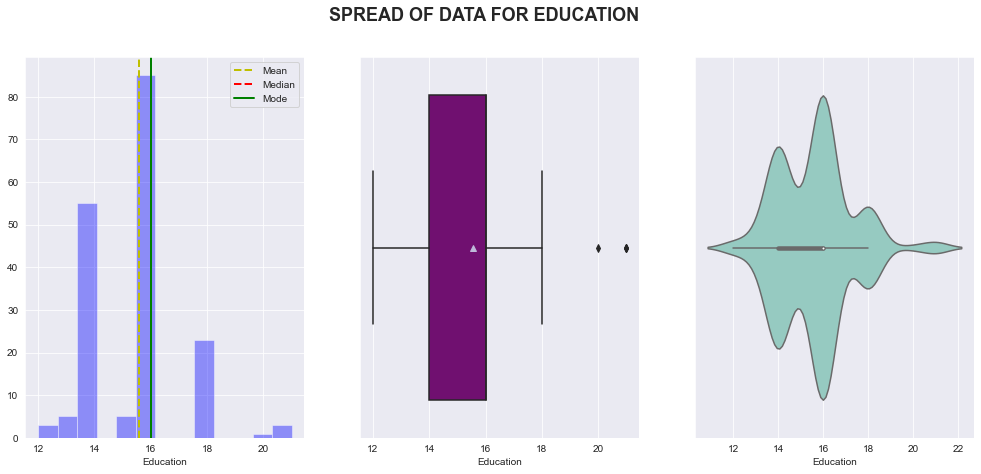

In [703]:
# Customer Education distribution

import math
def education_distribution(data):
    data_name,data_mean,data_median,data_mode = data_distribution(data)
    data_mean =  math.ceil(data_mean)
    data_median = math.ceil(data_median)
    data_mode = (math.ceil(data_mode))
    print(f"Average {data_name}: {data_mean}")
    print(f"Median {data_name}: {data_median}")
    print(f"Mode {data_name}: {data_mode}")
    print('-'*50)
    print(data.describe().T)
    dist_box_violin(data)

education_distribution(aerofit['Education'])


*Observation:*
* Education is Normally Skew as mean same as median.
* Most of the customer buying Aerofit product have 16 year of education (assuming them to be college graduates or bachelors).
* Most of the customer have education between 14 -16 years of education.

Average INCOME: $53,720.00
Median INCOME: $50,597.00
Mode INCOME: $45,480.00
--------------------------------------------------
count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64


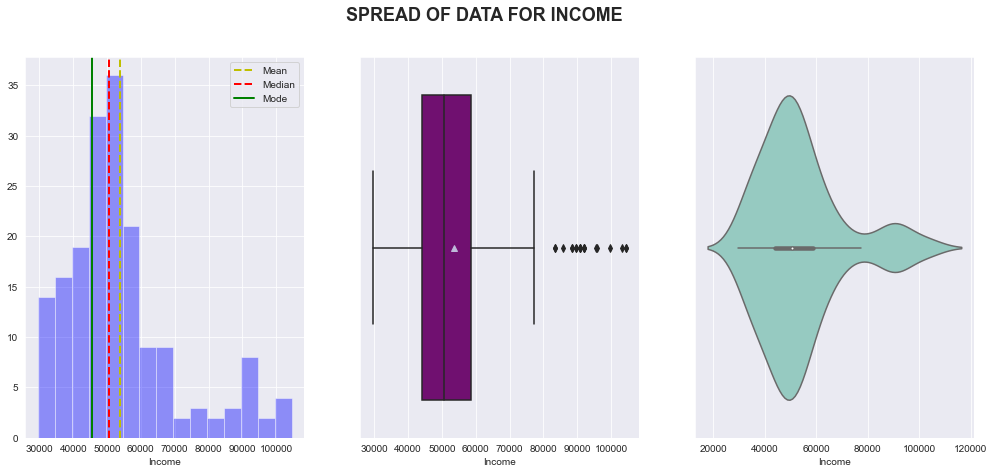

In [704]:
# Customer Income distribution
import math
def income_distribution(data):
    data_name,data_mean,data_median,data_mode = data_distribution(data)
    data_mean =  "${:,.2f}".format(math.ceil(data_mean))
    data_median ="${:,.2f}".format(math.ceil(data_median))
    data_mode =  "${:,.2f}".format(math.ceil(data_mode))
    print(f"Average {data_name}: {data_mean}")
    print(f"Median {data_name}: {data_median}")
    print(f"Mode {data_name}: {data_mode}")
    print('-'*50)
    print(data.describe())
    dist_box_violin(data)

income_distribution(aerofit['Income'])


*Observation:*
* Income is Skewed to Right / Positive Skew as mean is usually to the right of the median.
* Most of the customer buying Aerofit product is of income of $53,720.00.
* Most of the customer have income between $44K- $59K.
* As most of the customer is of younger age so most customer income is lower than 70K.

Average USAGE: 4 times/week
Median USAGE: 3 times/week
Mode USAGE: 3 times/week
--------------------------------------------------
count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64


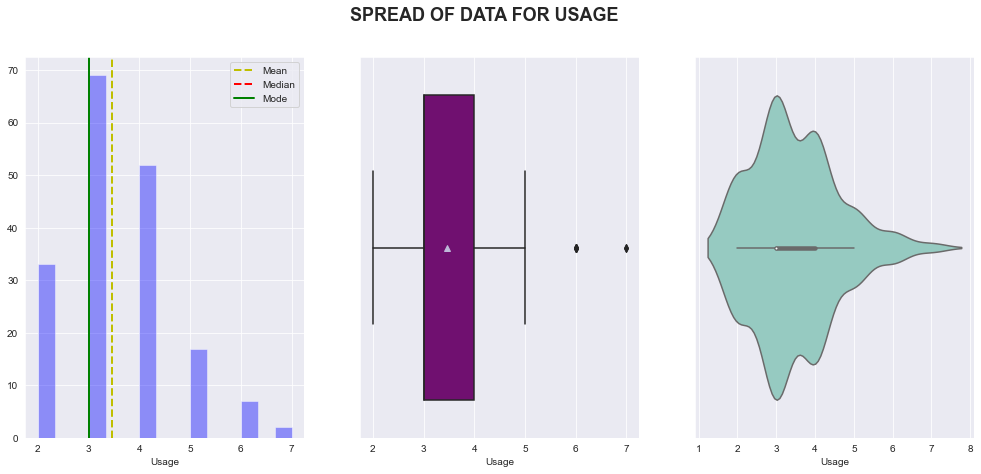

In [705]:
# Customer Usage product per week distribution
import math
def usage_distribution(data):
    data_name,data_mean,data_median,data_mode = data_distribution(data)
    data_mean =  math.ceil(data_mean)
    data_median = math.ceil(data_median)
    data_mode = (math.ceil(data_mode))
    print(f"Average {data_name}: {data_mean} times/week")
    print(f"Median {data_name}: {data_median} times/week")
    print(f"Mode {data_name}: {data_mode} times/week")
    print('-'*50)
    print(data.describe())
    dist_box_violin(data)

usage_distribution(aerofit['Usage'])


*Observation:*
* Usage is Skewed to Right / Positive Skew as mean is usually to the right of the median.
* Average customer use product 3-4 times per week.

Average FITNESS Rate: 4
Median FITNESS Rate: 3
Mode FITNESS Rate: 3
--------------------------------------------------
count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64


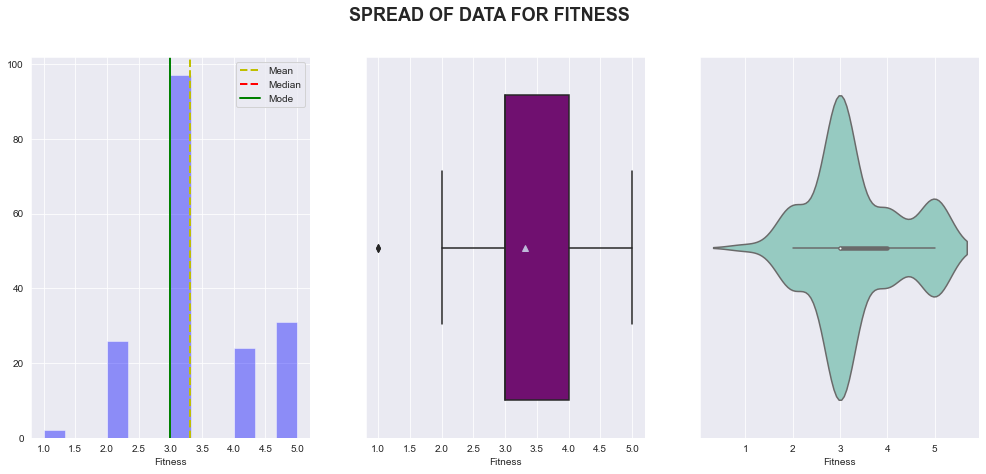

In [706]:
# Customer Fitness rate distribution

import math
def fitness_distribution(data):
    data_name,data_mean,data_median,data_mode = data_distribution(data)
    data_mean =  math.ceil(data_mean)
    data_median = math.ceil(data_median)
    data_mode = (math.ceil(data_mode))
    print(f"Average {data_name} Rate: {data_mean}")
    print(f"Median {data_name} Rate: {data_median}")
    print(f"Mode {data_name} Rate: {data_mode}")
    print('-'*50)
    print(data.describe())
    dist_box_violin(data)

fitness_distribution(aerofit['Fitness'])


*Observation:*
* Fitness rate is between 1-5.
* Fitne ratess is Skewed to Right / Positive Skew as mean is usually to the right of the median.
* Most of the customers have self-rated their fitness as 3-4( average).

Average MILES: 104/week
Median MILES: 94/week
Mode MILES: 85/week
--------------------------------------------------
count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64


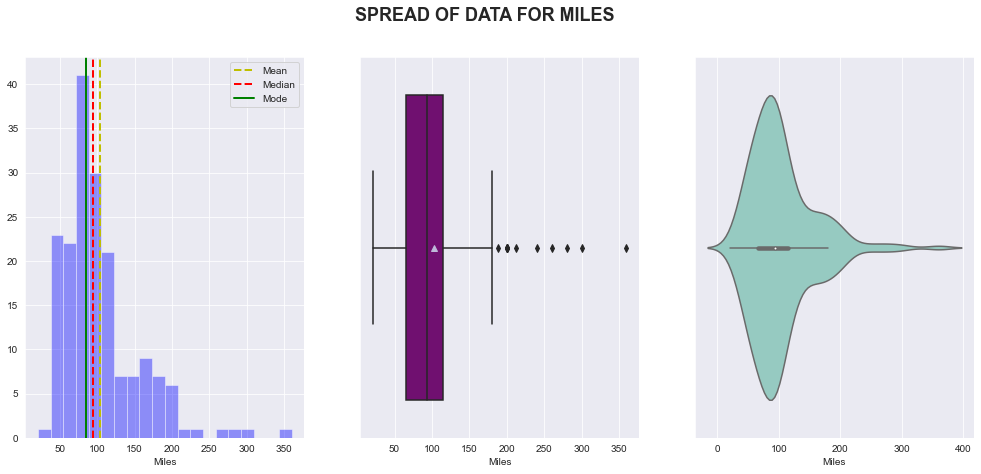

In [707]:
# Customer Covers Miles per week distribution

import math
def miles_distribution(data):
    data_name,data_mean,data_median,data_mode = data_distribution(data)
    data_mean =  math.ceil(data_mean)
    data_median = math.ceil(data_median)
    data_mode = (math.ceil(data_mode))
    print(f"Average {data_name}: {data_mean}/week")
    print(f"Median {data_name}: {data_median}/week")
    print(f"Mode {data_name}: {data_mode}/week")
    print('-'*50)
    print(data.describe())
    dist_box_violin(data)

miles_distribution(aerofit['Miles'])


*Observation:*
* Miles is Skewed to Right / Positive Skew as mean is usually to the right of the median.
* Customers expect to run on an average 104 miles per week.
* Mostly Customer run between 66 miles per week - 115 miles per week.

#### Bivariate Analysis : Non-Visual & Visual

In [708]:
# Average Age, Education, Income, Miles w.r.t different model

aerofit.groupby('Product')[['Age','Education','Income','Miles']].mean()

,Age,Education,Income,Miles
Product,,,,
KP281,28.55,15.037500,46418.025,82.787500
KP481,28.90,15.116667,48973.650,87.933333
KP781,29.10,17.325000,75441.575,166.900000


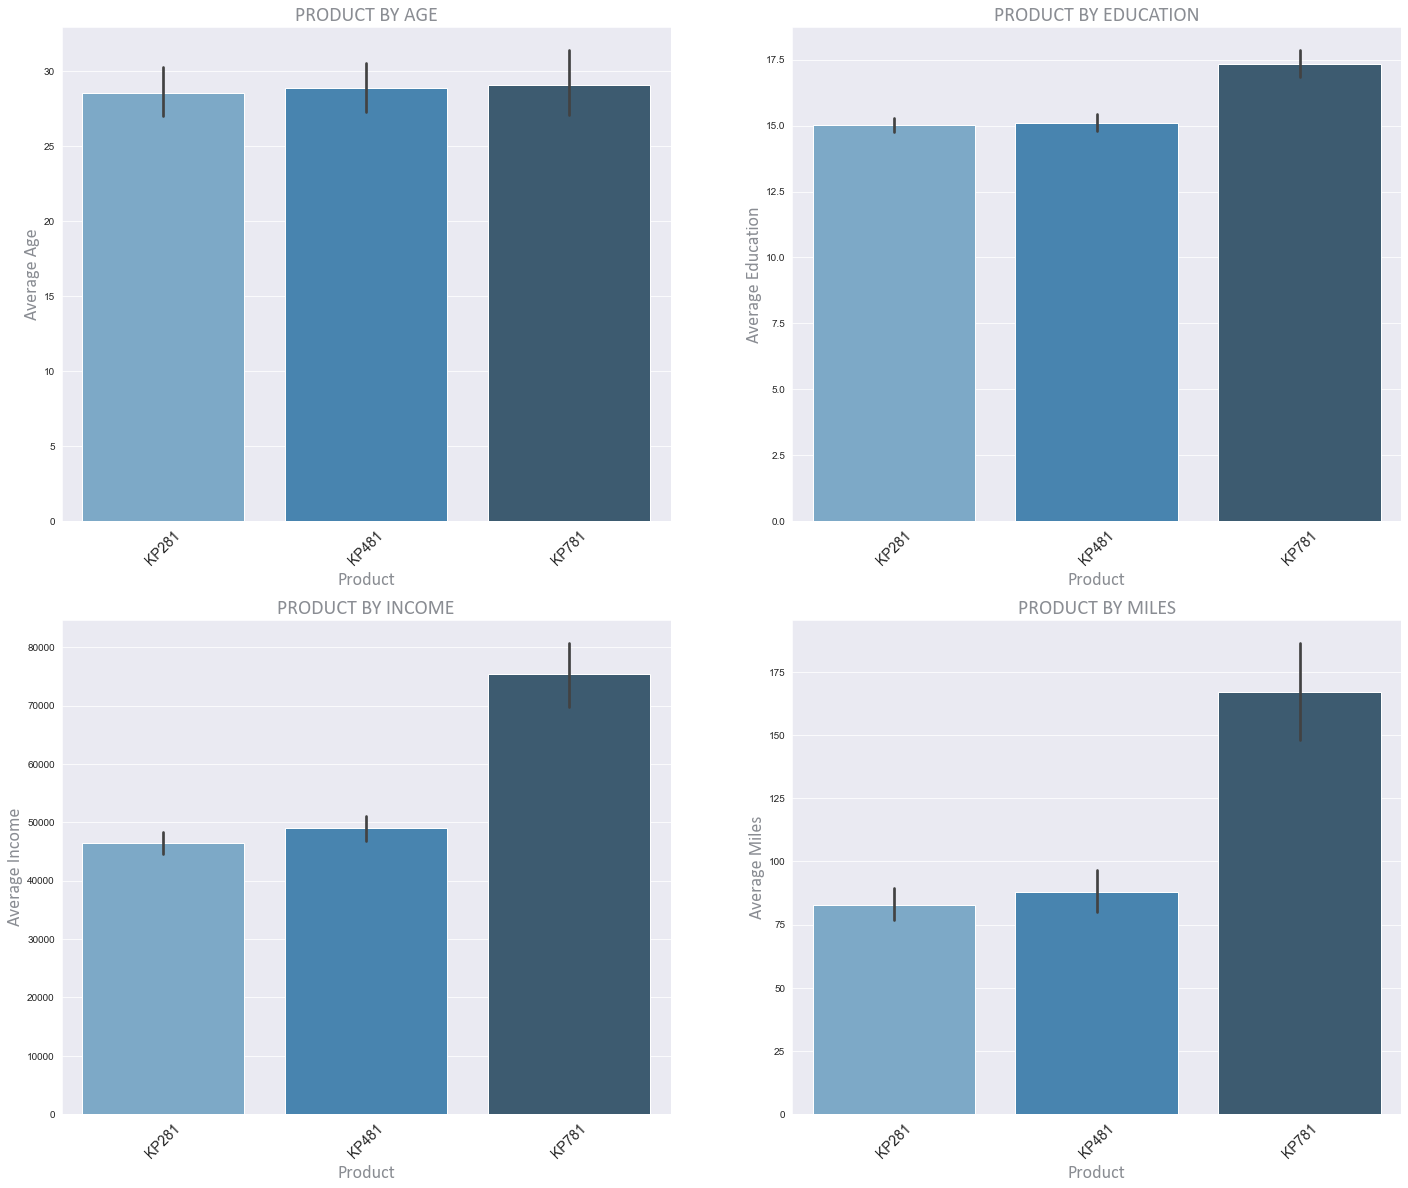

In [709]:
fig1, axes =plt.subplots(2,2,figsize=(24, 20))
list1_col=['Age','Education','Income','Miles']
x_tick = aerofit['Product'].unique().tolist()
#instead of writing  boxplot 6 times using for loop

for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes[row,col]
    sns.barplot(aerofit['Product'],aerofit[list1_col[i]],ax=ax, palette="Blues_d")
    ax.set_title(f'PRODUCT BY {list1_col[i].upper()}', fontdict={'fontsize': 20, 'color':'#8a8d93','family':'Calibri'})
    ax.set_xticklabels(x_tick,rotation=45,size=14)
    # ax.set_yticklabels(rotation=45,size=14)
    ax.set_xlabel('Product',fontsize=18,color='#8a8d93',family="Calibri")
    ax.set_ylabel(f'Average {list1_col[i]}',fontsize=18,color='#8a8d93',family="Calibri")


plt.show()
    

*Observation:*
* //TODO

In [710]:
pd.crosstab(aerofit['Product'],aerofit['Gender'] )

# pd.pivot_table(aerofit,'Gender','Product',aggfunc='count')
# aerofit.groupby(['Product','Gender']).size().unstack()

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [711]:
def barPlot(aerofit,x_feature,hue_feature):
    plt.figure(figsize=(15,8))
    colors = ['#ffb3e6','#c2c2f0']
    ax = sns.countplot(data=aerofit,x=x_feature,hue=hue_feature,color=colors,palette=colors,linewidth=3)
    plt.title("PRODUCT By Gender",fontsize=20,color='#8a8d93',family="Calibri")
    plt.xticks(rotation=45,size=14)
    plt.yticks(rotation=45,size=14)
    plt.xlabel('Product',fontsize=18,color='#8a8d93',family="Calibri")
    plt.ylabel('Count',fontsize=18,color='#8a8d93',family="Calibri")
    plt.legend(fontsize=16,frameon=False)
    for p in ax.patches:
      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
    plt.show()

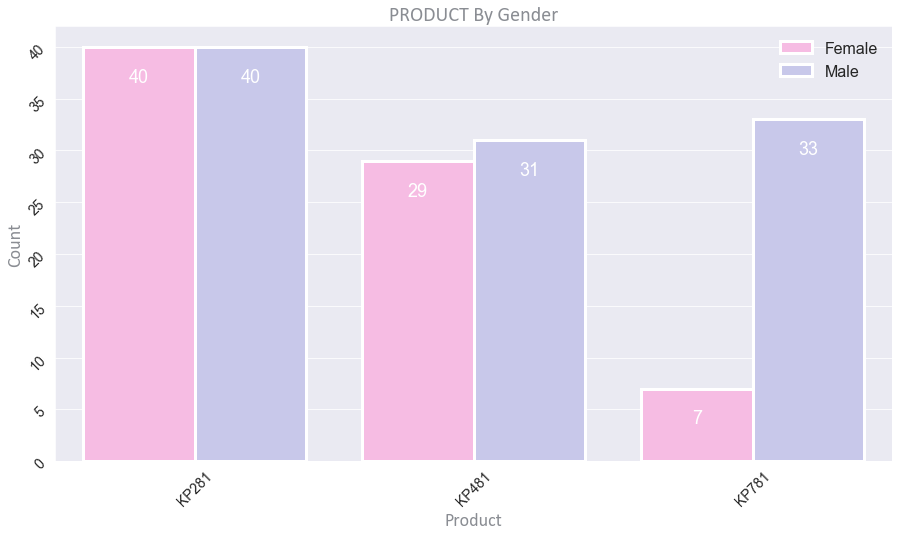

In [712]:
barPlot(aerofit,'Product','Gender')

*Observation:*
* KP281 Product is equally used by male or female customer.
* KP481 Product is bought more by Male as compare to female.
* KP781 Product is bought more by male as compare to female.

In [713]:
pd.crosstab(aerofit['Product'],aerofit['MaritalStatus'] )

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


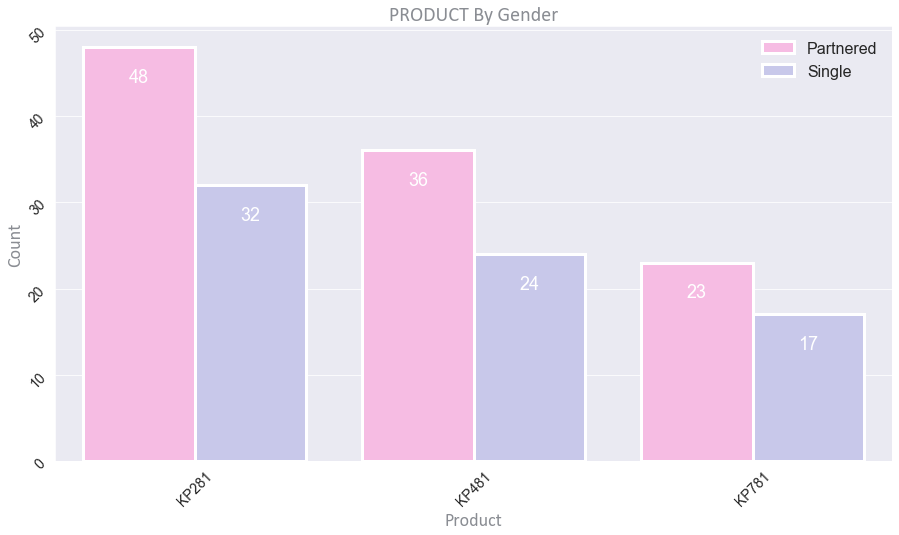

In [714]:
barPlot(aerofit,'Product','MaritalStatus')

*Observation:*
* Ratio of KP281 product is used by Partnered or single customer of ratio 48:32. 
* Ratio of KP481 product is used by Partnered or single customer of ratio 36:24. 
* Ratio of KP781 product is used by Partnered or single customer of ratio 23:17. 

In [715]:
pd.crosstab(aerofit['Product'],aerofit['Usage'] )

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,19,37,22,2,0,0
KP481,14,31,12,3,0,0
KP781,0,1,18,12,7,2


In [716]:
def barPlot(aerofit,x_feature,hue_feature):
    plt.figure(figsize=(15,8))
    colors = ['#ffb3e6','#c2c2f0']
    ax = sns.countplot(data=aerofit,x=x_feature,hue=hue_feature,color=colors,palette="Set3",linewidth=5
    )
    plt.title("PRODUCT Usage per Week",fontsize=20,color='#8a8d93',family="Calibri")
    plt.xticks(rotation=45,size=14)
    plt.yticks(rotation=45,size=14)
    plt.xlabel('Product',fontsize=18,color='#8a8d93',family="Calibri")
    plt.ylabel('Count',fontsize=18,color='#8a8d93',family="Calibri")
    plt.legend(fontsize=16,frameon=False)
    # ax.set_facecolor('#454545')
    for p in ax.patches:
      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='#454545', size=18)
    plt.show()

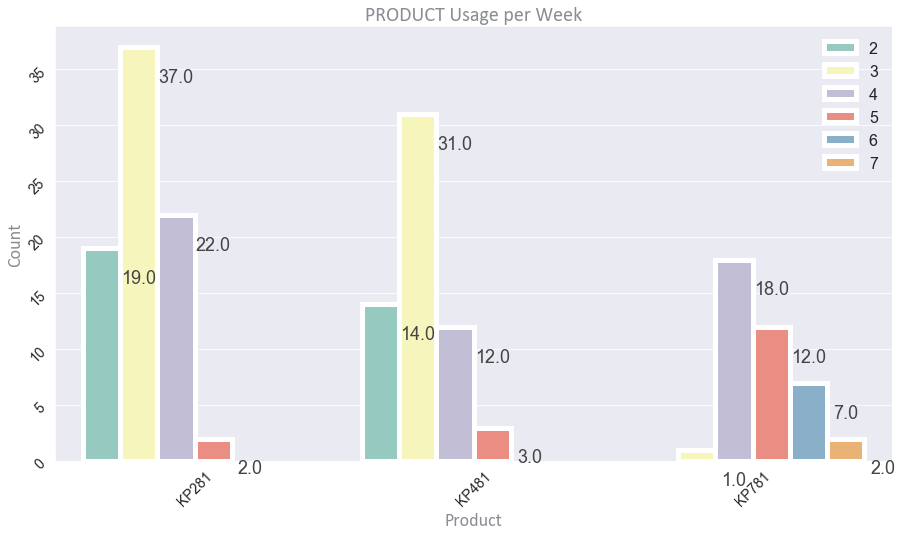

In [717]:
barPlot(aerofit,'Product','Usage')

*Observation:*
* KP281 mostly usage 3 times a week.
* KP481 mostly usage 3 times a week. 
* KP781 mostly usage 4 times a week.

In [718]:
pd.crosstab(aerofit['Product'],aerofit['Fitness'] )

Fitness,1,2,3,4,5
Product,,,,,
KP281,1,14,54,9,2
KP481,1,12,39,8,0
KP781,0,0,4,7,29


In [719]:
def barPlot(aerofit,x_feature,hue_feature):
    plt.figure(figsize=(15,8))
    colors = ['#ffb3e6','#c2c2f0']
    ax = sns.countplot(data=aerofit,x=x_feature,hue=hue_feature,color=colors,palette="Set3",linewidth=5
    )
    plt.title("PRODUCT Fitness Rate",fontsize=20,color='#8a8d93',family="Calibri")
    plt.xticks(rotation=45,size=14)
    plt.yticks(rotation=45,size=14)
    plt.xlabel('Product',fontsize=18,color='#8a8d93',family="Calibri")
    plt.ylabel('Count',fontsize=18,color='#8a8d93',family="Calibri")
    plt.legend(fontsize=16,frameon=False)
    # ax.set_facecolor('#454545')
    for p in ax.patches:
      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center', color='#454545', size=18)
    plt.show()

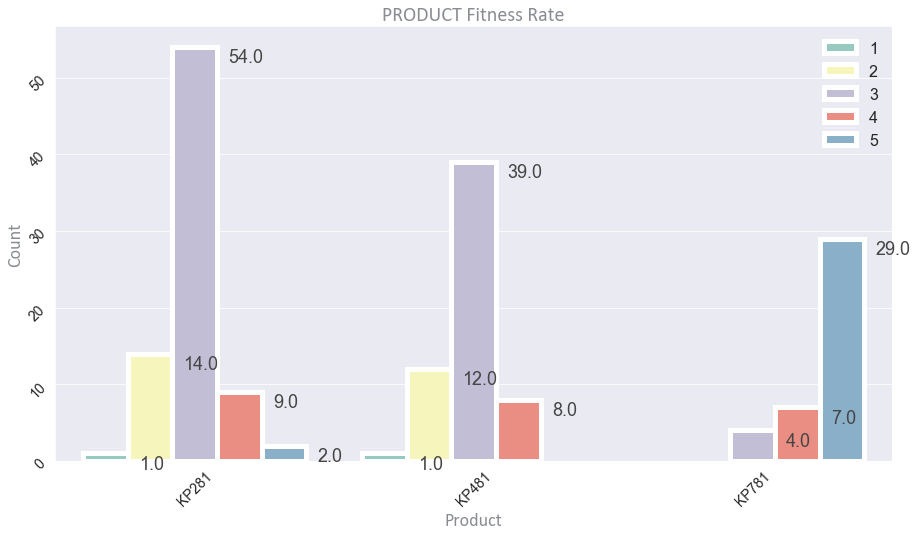

In [720]:
barPlot(aerofit,'Product','Fitness')

*Observation:*
* KP781 Product customer prefer to fit at 5 Fitness rate.
* KP481 Product customer prefer to fit at 3 Fitness rate.
* KP281 Product customer prefer to fit at 3 Fitness rate.

#### Multivariate Analysis : Non-Visual & Visual

##### Coorelation

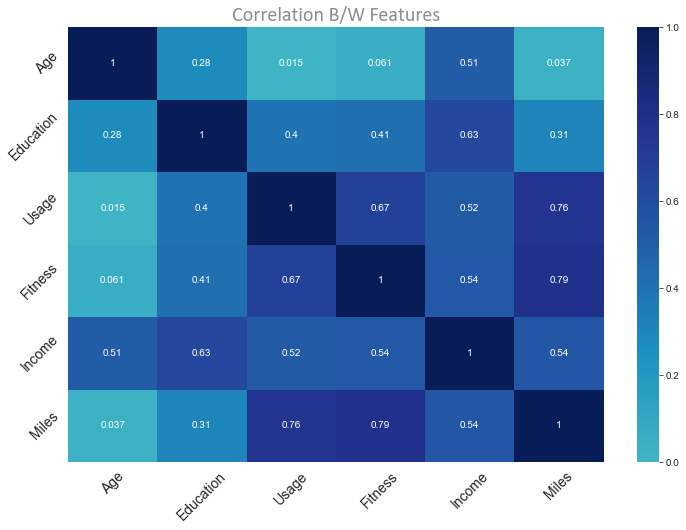

In [721]:
plt.figure(figsize=(12,8))
aerofit_corr = aerofit.corr()
sns.heatmap(aerofit_corr,annot=True,vmin=0, vmax=1,center=0,cmap="YlGnBu")
plt.title("Correlation B/W Features",fontsize=20,color='#8a8d93',family="Calibri")
plt.xticks(rotation=45,size=14)
plt.yticks(rotation=45,size=14)

plt.show()

In [722]:
corr_pairs = aerofit_corr.unstack() # give pairs of correlation
print( corr_pairs[abs(corr_pairs)>0.5]) # Gives us correlated data

Age        Age          1.000000
           Income       0.513414
Education  Education    1.000000
           Income       0.625827
Usage      Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles      Usage        0.759130
           Fitness      0.785702
           Income       0.543473
           Miles        1.000000
dtype: float64


<Figure size 864x576 with 0 Axes>

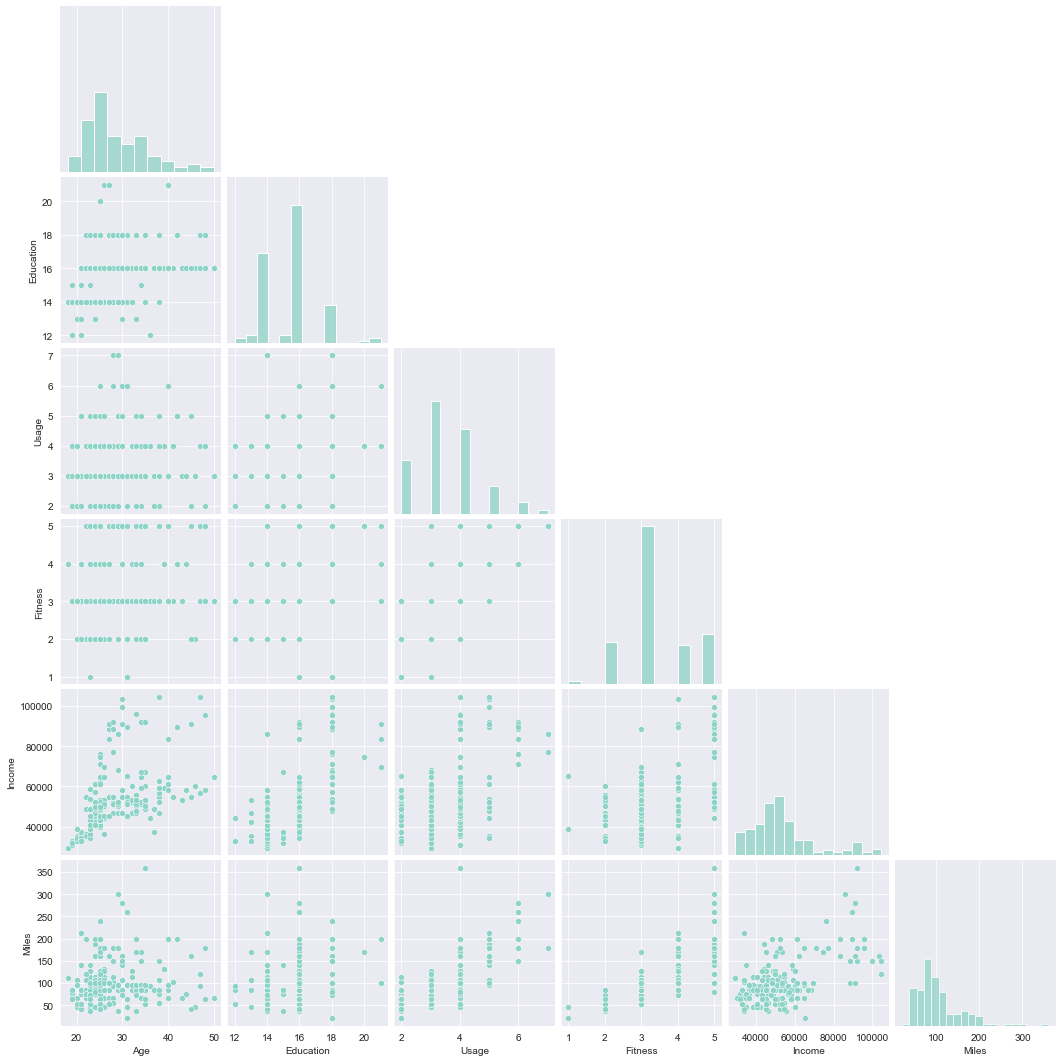

In [723]:
plt.figure(figsize=(12,8))
sns.pairplot(aerofit,corner=True)
plt.show()

<Figure size 864x576 with 0 Axes>

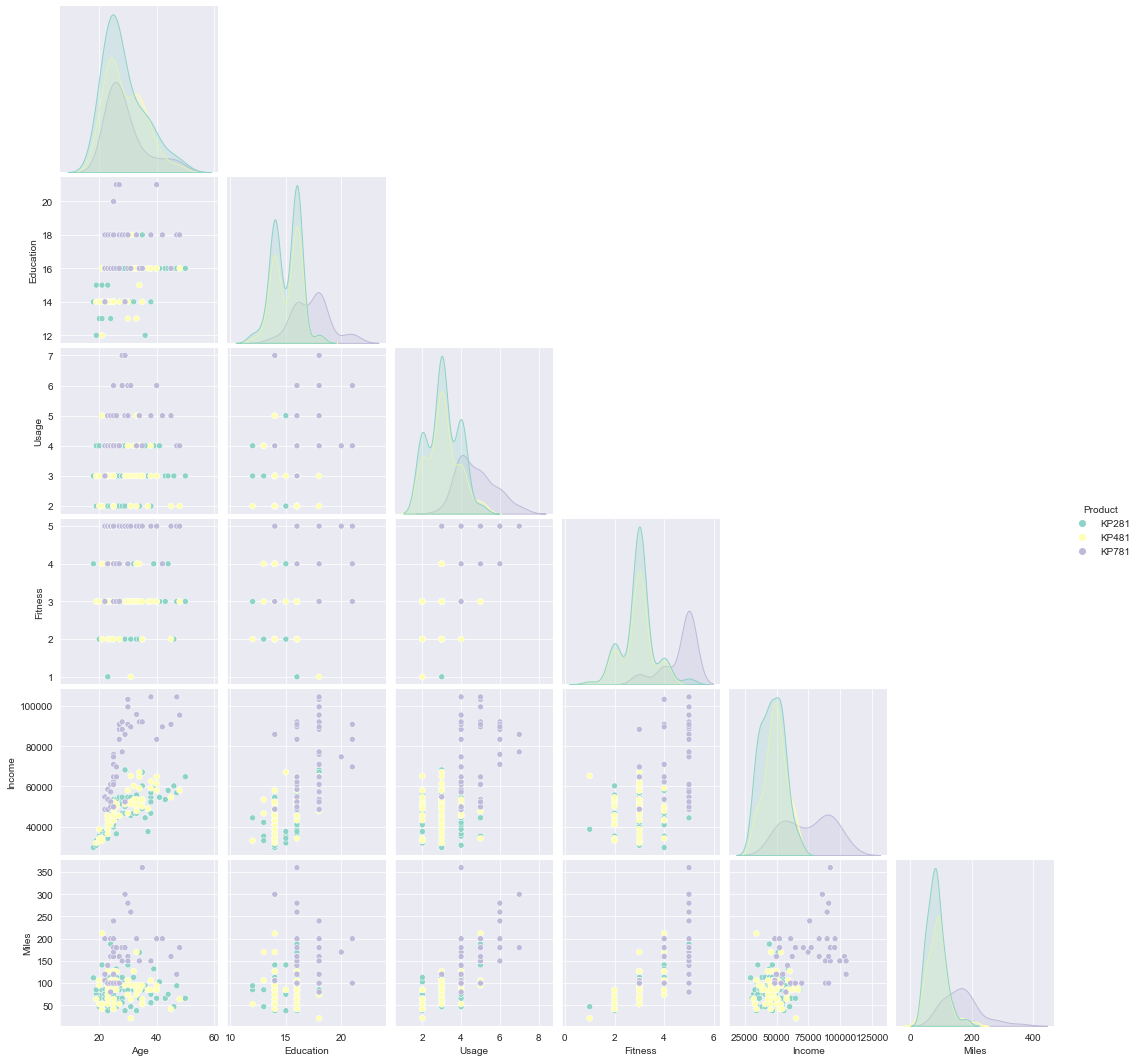

In [724]:
plt.figure(figsize=(12,8))
g = sns.pairplot(aerofit,corner=True,hue='Product')
plt.xticks(rotation=45,size=14)
plt.yticks(rotation=45,size=14)
plt.show()

* Observation

    * Age is correlate with Income with 0.5.
    * Education is correlated with Income with 0.63.
    * Usage is correlated with Fitness,Income,Miles at 0.67,0.52,0.76.
    * Fitness is correlated with Usage,income, Miles at 0.67,0.53,0.79.

##### Multivariate Analysis

In [725]:
pd.pivot_table(aerofit,index=["Product","Gender"],columns=["MaritalStatus"],aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
KP281   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
KP481   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
KP781   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
KP281   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
KP481   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
KP781   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [726]:
a = pd.pivot_table(aerofit,['Income','Education'],index=["Product","Gender"],columns=["MaritalStatus"])
a

Education                   Income              
MaritalStatus   Partnered     Single     Partnered        Single
Product Gender                                                  
KP281   Female  14.888889  15.538462  46153.777778  45742.384615
        Male    15.428571  14.473684  50028.000000  43265.842105
KP481   Female  15.200000  15.214286  49724.800000  48920.357143
        Male    15.285714  14.500000  49378.285714  47071.800000
KP781   Female  17.500000  18.333333  84972.250000  58516.000000
        Male    17.421053  16.928571  81431.368421  68216.428571

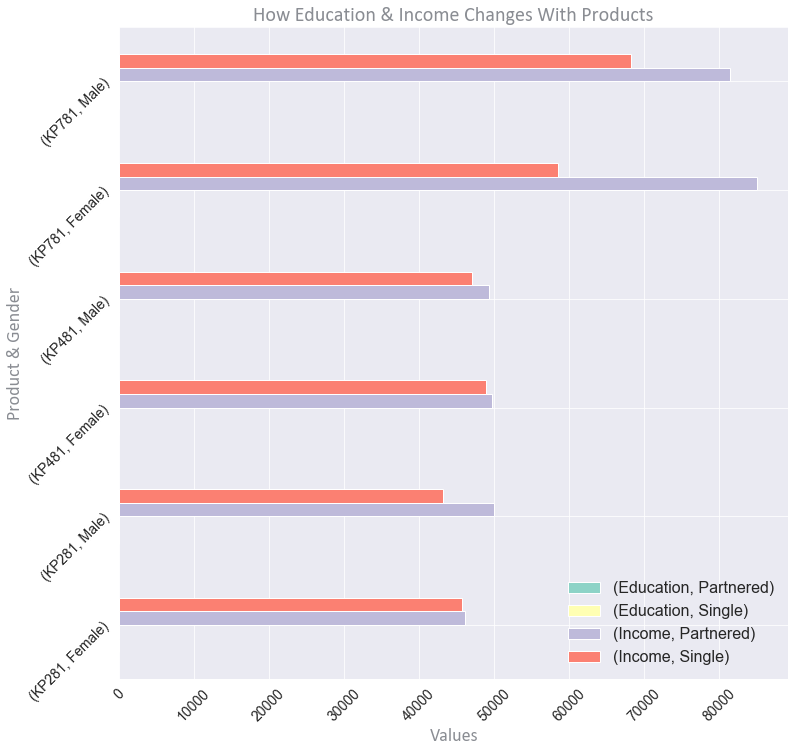

In [727]:

a.plot(kind='barh',figsize=(12, 12))
plt.title("How Education & Income Changes With Products",fontsize=20,color='#8a8d93',family="Calibri")
plt.xticks(rotation=45,size=14)
plt.yticks(rotation=45,size=14)
plt.xlabel('Values',fontsize=18,color='#8a8d93',family="Calibri")
plt.ylabel('Product & Gender',fontsize=18,color='#8a8d93',family="Calibri")
plt.legend(fontsize=16,frameon=False)
plt.show()

* Observation

    * KP781 Product Male& Female Customer have high Education and High Income.
    * KP481 Product Male Customer have same Education & Income as KP281 product Male Customer.
    * KP281 Product Female Customer have higher Education & Income as KP281 product Female Customer.

In [728]:
 b= pd.pivot_table(aerofit,['Usage','Fitness','Miles'],index=["Product","Gender"],columns=["MaritalStatus"])
b

Fitness                 Miles                 Usage          
MaritalStatus  Partnered    Single   Partnered      Single Partnered    Single
Product Gender                                                                
KP281   Female  2.851852  2.923077   74.925926   78.846154  2.851852  3.000000
        Male    2.857143  3.263158   80.190476   99.526316  3.285714  3.263158
KP481   Female  2.933333  2.785714   94.000000   80.214286  3.333333  2.928571
        Male    2.904762  3.000000   87.238095   91.100000  2.857143  3.300000
KP781   Female  5.000000  4.000000  215.000000  133.333333  5.250000  4.666667
        Male    4.631579  4.642857  176.315789  147.571429  4.842105  4.571429

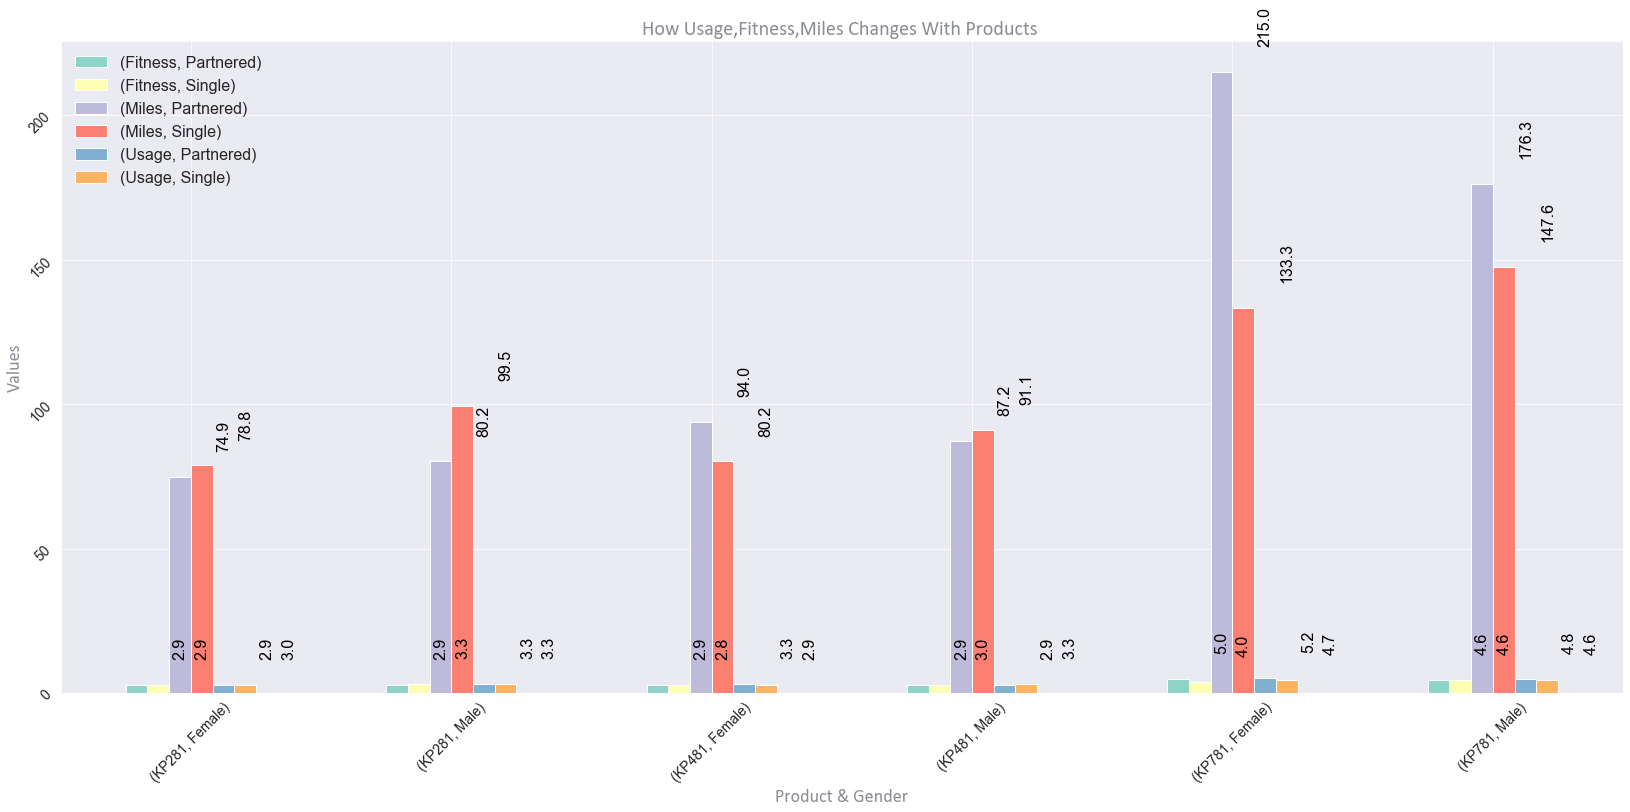

In [729]:

ax = b.plot(kind='bar',figsize=(28, 12))
plt.title("How Usage,Fitness,Miles Changes With Products ",fontsize=20,color='#8a8d93',family="Calibri")
plt.xticks(rotation=45,size=14)
plt.yticks(rotation=45,size=14)
plt.xlabel('Product & Gender',fontsize=18,color='#8a8d93',family="Calibri")
plt.ylabel('Values',fontsize=18,color='#8a8d93',family="Calibri")
plt.legend(fontsize=16,frameon=False)
for p in ax.patches:

    ax.annotate(f'\n{round(p.get_height(),1)}', (p.get_x()+0.2, p.get_height()), ha='right', va='bottom', color='black', size=16,rotation=90, xytext=(10, 25), textcoords='offset points',annotation_clip=False)
plt.show()


* Observation

    * Male & Female Customer with a fitness rate of 3 and Usage 3-4 times per week Prefer KP281,KP481 Model.
    * Male & Female Customer with a fitness rate of 4-5 ans Usage 5-6 times per week Prefer KP781 Model.

<Figure size 1584x1224 with 0 Axes>

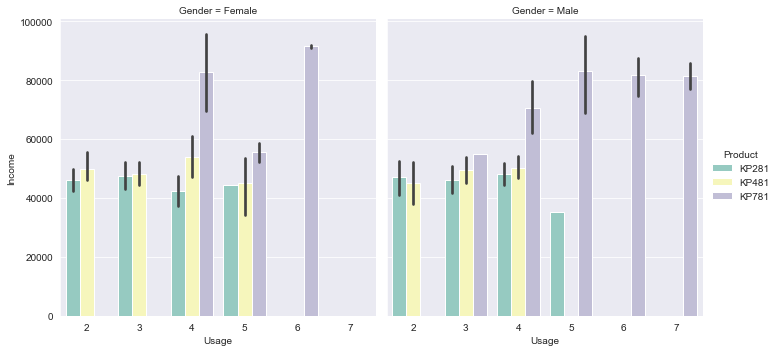

In [730]:
plt.figure(figsize=(22,17))
sns.catplot(x="Usage", y="Income",
                col='Gender',hue='Product',
                data=aerofit, kind="bar"
               )

* Observation

    * Male customer with higher income ,bought KP781 Model and expect to use treadmill 4-6 /week
    * Customer who bought KP281 and KP781 are in same income range and expect to use treadmill 3-4 /week.

In [731]:
pd.crosstab(index=[aerofit["Product"],aerofit['Gender']], columns=aerofit["MaritalStatus"])   


MaritalStatus   Partnered  Single
Product Gender                   
KP281   Female         27      13
        Male           21      19
KP481   Female         15      14
        Male           21      10
KP781   Female          4       3
        Male           19      14

<AxesSubplot:xlabel='Product'>

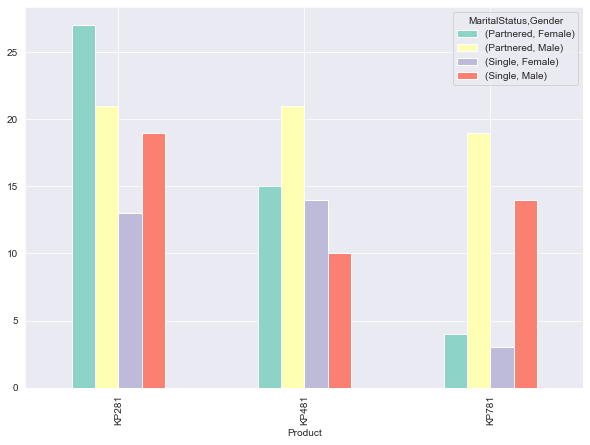

In [732]:
c = pd.crosstab(index=[aerofit["Product"]], columns=[aerofit["MaritalStatus"],aerofit['Gender']])   
c.plot(kind='bar',figsize=(10,7))

<Figure size 2016x1440 with 0 Axes>

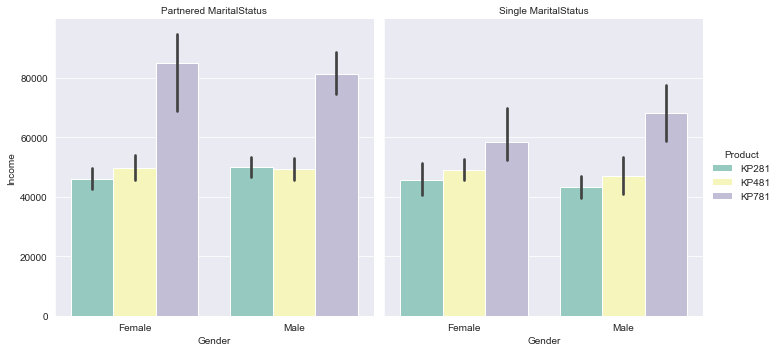

In [733]:
plt.figure(figsize=(28,20))
g = sns.catplot(x="Gender", y="Income",
                col='MaritalStatus',hue='Product',
                data=aerofit, kind="bar"
               )
(g.set_axis_labels("Gender", "Income")
  .set_xticklabels(["Female", "Male"])
  .set_titles("{col_name} {col_var}")
)
plt.show()

In [734]:
pd.crosstab(index=aerofit['Product'],columns=[aerofit['Gender'],aerofit['Fitness']])

Gender  Female               Male              
Fitness      1   2   3  4  5    1  2   3  4   5
Product                                        
KP281        0  10  26  3  1    1  4  28  6   1
KP481        1   6  18  4  0    0  6  21  4   0
KP781        0   0   1  1  5    0  0   3  6  24

* *Observation:*

    * Single Female customers bought KP281 model more than Single male customers.
    * Partnered Male customers bought KP781 model more than Single Male customers.
    * There are more single males buying Treadmill than single Females.
    * Single Male customers bought KP781 Model compared to Single Female.
    * Sale are equally for KP281,KP481 model betwwen Male and female.
    * The majority of our buyers are man.

<Figure size 1152x864 with 0 Axes>

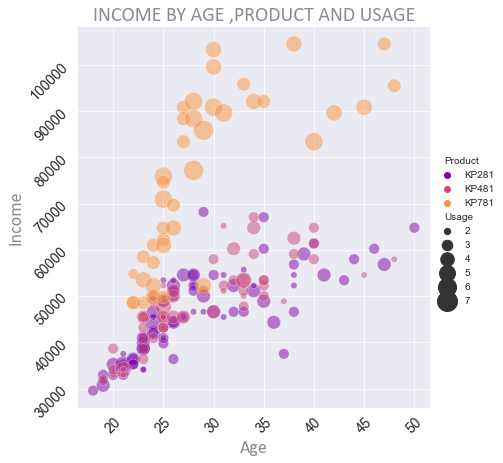

In [735]:
#scatter plot between income, age ,product and usage
plt.figure(figsize=(16,12))
sns.relplot(x="Age", y="Income", hue="Product", size="Usage",

            sizes=(40, 400), alpha=.5, palette="plasma",
            height=6, data=aerofit)
plt.title("INCOME BY AGE ,PRODUCT AND USAGE",fontsize=20,color='#8a8d93',family="Calibri")
plt.xticks(rotation=45,size=14)
plt.yticks(rotation=45,size=14)
plt.xlabel('Age',fontsize=18,color='#8a8d93',family="Calibri")
plt.ylabel('Income',fontsize=18,color='#8a8d93',family="Calibri")
# plt.legend(fontsize=14,frameon=False)
plt.show()

* *Observation:*

    * Products KP281 and KP481 are bought by people with lower than 70K as income and age is concentrated more in range of 23-35.
    * Product KP781 is mainly bought by people with higher than 70K income and age falls in range of 23-30.
    * Majority of people who buys the KP781 expect that they will run more than consumers of the other two products, on average.

## Asking Questions

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


<Figure size 288x144 with 0 Axes>

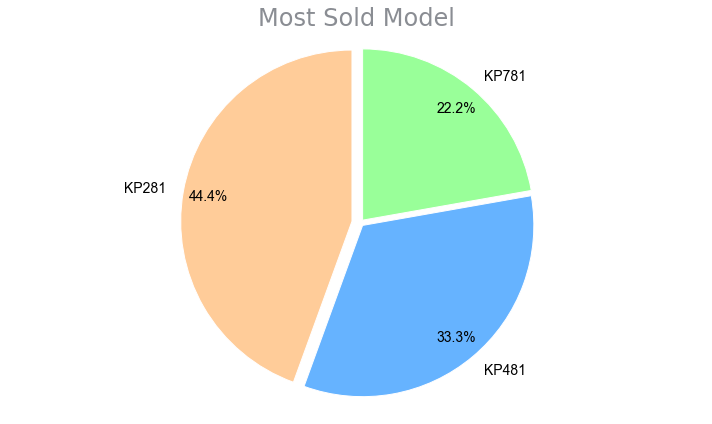

In [736]:
# Which model is most sold?

def donut_perc(df,feature,title):
    index = df[feature].value_counts().index
    data = df[feature].value_counts()
    print(data)
    
    plt.figure(figsize=(4,2))
    fig1, ax1 = plt.subplots(figsize=(10,6))
    explode = (0.05,0.02,0.02)
    colors = ['#ffcc99','#66b3ff','#99ff99']
    ax1.pie(data,autopct='%1.1f%%',explode=explode,labels=index,colors=colors,pctdistance=0.85,startangle=90,textprops={'fontsize': 14,'color':'black'})
    plt.title(title,fontsize=24,color='#8a8d93',family="'Bebas Neue', cursive")
    ax1.axis('equal')
    plt.tight_layout()
    plt.show()

donut_perc(aerofit,'Product','Most Sold Model')

In [737]:
# Which product is preffered by male Partned Customers and male Single Customer

a = aerofit[(aerofit['Gender']== 'Male') & (aerofit['MaritalStatus']== 'Single')]['Product'].value_counts().to_list()
b = aerofit[(aerofit['Gender']== 'Male') & (aerofit['MaritalStatus']== 'Partnered')]['Product'].value_counts().to_list()
index = aerofit['Product'].unique().tolist()
frame = {'Sales - Male Single':a,'Sales - Male Partnered':b}
ans = pd.DataFrame(frame,index=index)
ans

,Sales - Male Single,Sales - Male Partnered
KP281,19,21
KP481,14,21
KP781,10,19


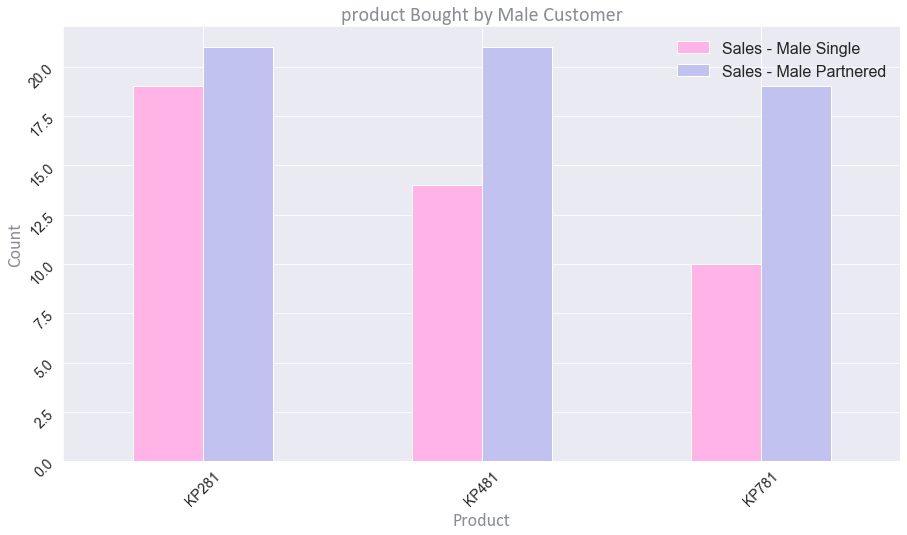

In [738]:

colors = ['#ffb3e6','#c2c2f0']
ans.plot(kind='bar',color=colors,figsize=(15,8))
plt.title("product Bought by Male Customer",fontsize=20,color='#8a8d93',family="Calibri")
plt.xticks(rotation=45,size=14)
plt.yticks(rotation=45,size=14)
plt.xlabel('Product',fontsize=18,color='#8a8d93',family="Calibri")
plt.ylabel('Count',fontsize=18,color='#8a8d93',family="Calibri")
plt.legend(fontsize=16,frameon=False)
for p in ax.patches:
      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

In [739]:
# . Which product is preferred by customers having poor to average fitness 
    #  and average to good fitness?
    
a = aerofit[aerofit['Fitness']<aerofit['Fitness'].median()]['Product'].value_counts().to_list()
b = aerofit[aerofit['Fitness']>aerofit['Fitness'].median()]['Product'].value_counts().to_list()
index = aerofit['Product'].unique().tolist()
frame = {'poor-average':a,'average-good':b}
ans = pd.DataFrame(frame,index=index)
ans

,poor-average,average-good
KP281,15,36
KP481,13,11
KP781,0,8


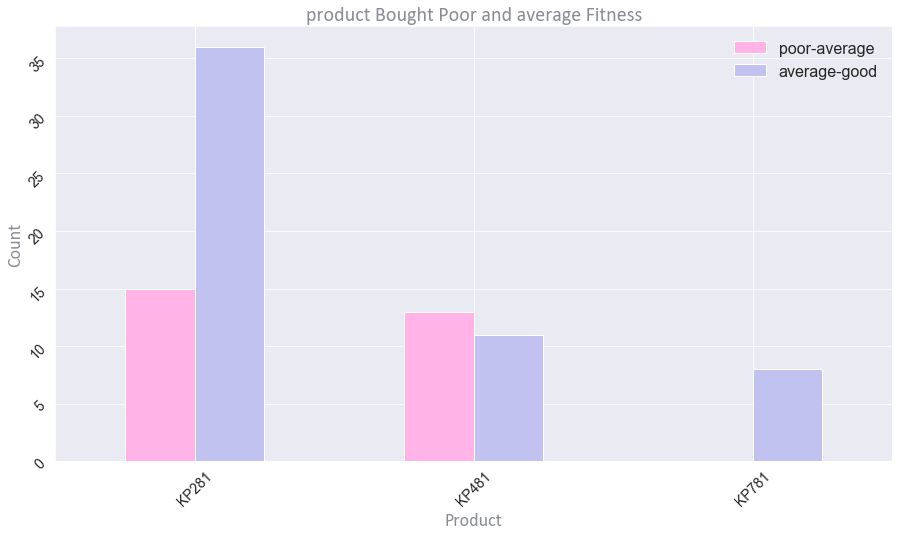

In [740]:

colors = ['#ffb3e6','#c2c2f0']
ans.plot(kind='bar',color=colors,figsize=(15,8))
plt.title("product Bought Poor and average Fitness",fontsize=20,color='#8a8d93',family="Calibri")
plt.xticks(rotation=45,size=14)
plt.yticks(rotation=45,size=14)
plt.xlabel('Product',fontsize=18,color='#8a8d93',family="Calibri")
plt.ylabel('Count',fontsize=18,color='#8a8d93',family="Calibri")
plt.legend(fontsize=16,frameon=False)
for p in ax.patches:
      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

In [741]:
#  Which product is preferred by customers expected to use for less than 100 miles?

a = aerofit[aerofit['Miles']<aerofit['Miles'].median()]['Product'].value_counts().to_list()
b = aerofit[aerofit['Miles']>aerofit['Miles'].median()]['Product'].value_counts().to_list()
index = aerofit['Product'].unique().tolist()
frame = {'Miles < 100':a,'Miles > 100':b}
ans = pd.DataFrame(frame,index=index)
ans

,Miles < 100,Miles > 100
KP281,54,39
KP481,32,28
KP781,1,18


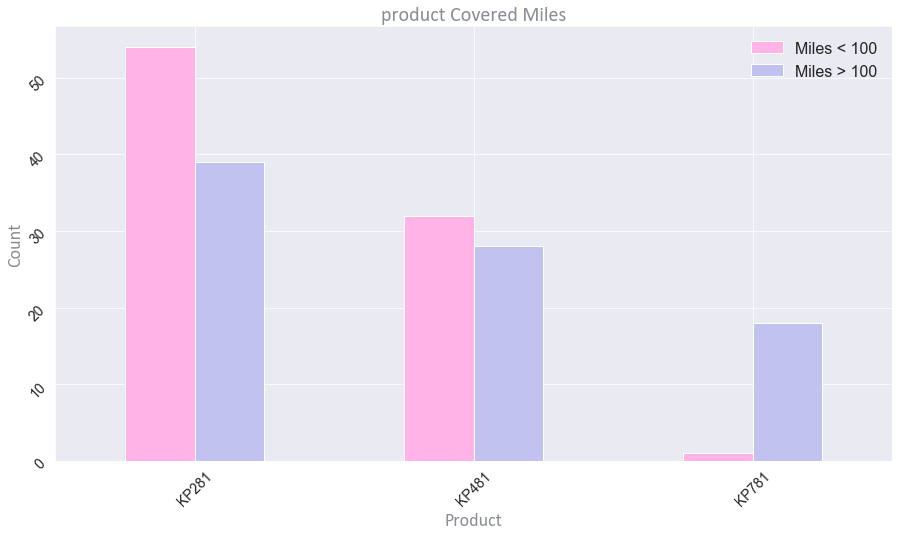

In [742]:

colors = ['#ffb3e6','#c2c2f0']
ans.plot(kind='bar',color=colors,figsize=(15,8))
plt.title("product Covered Miles",fontsize=20,color='#8a8d93',family="Calibri")
plt.xticks(rotation=45,size=14)
plt.yticks(rotation=45,size=14)
plt.xlabel('Product',fontsize=18,color='#8a8d93',family="Calibri")
plt.ylabel('Count',fontsize=18,color='#8a8d93',family="Calibri")
plt.legend(fontsize=16,frameon=False)
for p in ax.patches:
      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

In [743]:
# Customers having annual income less than and greater than 50K.


a = aerofit[aerofit['Income']<aerofit['Income'].median()]['Product'].value_counts().to_list()
b = aerofit[aerofit['Income']>aerofit['Income'].median()]['Product'].value_counts().to_list()
index = aerofit['Product'].unique().tolist()
frame = {'Income < 50K':a,'Income > 50K':b}
ans = pd.DataFrame(frame,index=index)
ans

,Income < 50K,Income > 50K
KP281,50,35
KP481,35,30
KP781,5,25


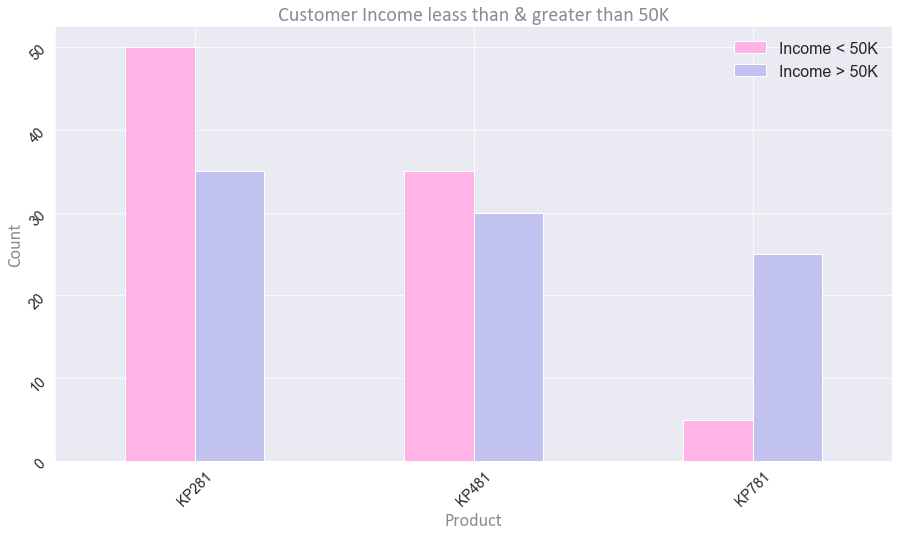

In [744]:

colors = ['#ffb3e6','#c2c2f0']
ans.plot(kind='bar',color=colors,figsize=(15,8))
plt.title("Customer Income leass than & greater than 50K",fontsize=20,color='#8a8d93',family="Calibri")
plt.xticks(rotation=45,size=14)
plt.yticks(rotation=45,size=14)
plt.xlabel('Product',fontsize=18,color='#8a8d93',family="Calibri")
plt.ylabel('Count',fontsize=18,color='#8a8d93',family="Calibri")
plt.legend(fontsize=16,frameon=False)
for p in ax.patches:
      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

In [745]:
# How is the love for a product for customers aiming average workout(80-150) compared to all customers bought that product?

a = aerofit[(aerofit['Miles']<150) &(aerofit['Miles']>80)]['Product'].value_counts()*100/aerofit['Product'].value_counts().to_list()
index = aerofit['Product'].unique().tolist()
frame = {'Product Count':a}
ans = pd.DataFrame(frame,index=index)
ans

,Product Count
KP281,50.0
KP481,60.0
KP781,30.0


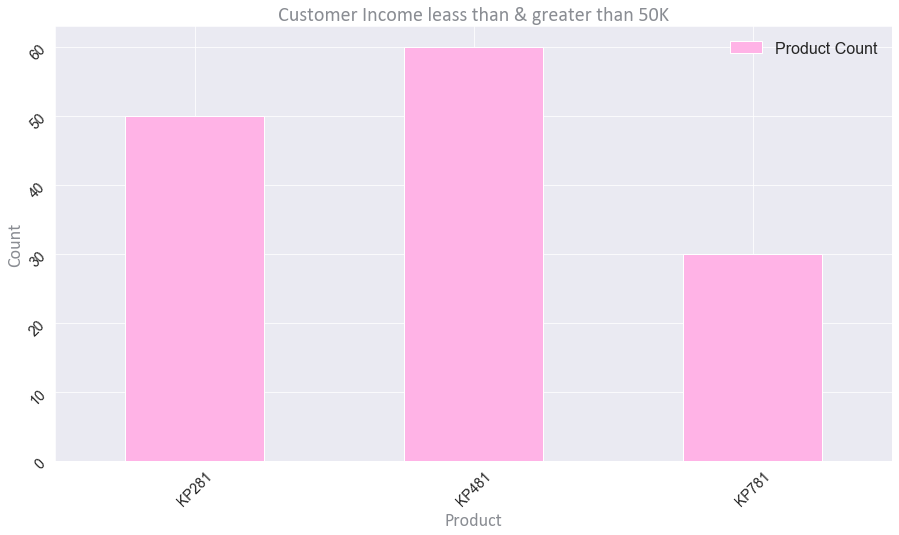

In [746]:

colors = ['#ffb3e6','#c2c2f0']
ans.plot(kind='bar',color=colors,figsize=(15,8))
plt.title("Customer Income leass than & greater than 50K",fontsize=20,color='#8a8d93',family="Calibri")
plt.xticks(rotation=45,size=14)
plt.yticks(rotation=45,size=14)
plt.xlabel('Product',fontsize=18,color='#8a8d93',family="Calibri")
plt.ylabel('Count',fontsize=18,color='#8a8d93',family="Calibri")
plt.legend(fontsize=16,frameon=False)
for p in ax.patches:
      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

* *Observation:*
    * The 60% customers who bought TM498 are aiming medium workout(80 - 150 miles per week), where as it is 50% for TM195 and 30% for TM798.

In [747]:
# How values of income, usage, miles etc of females who bought KP781 are different from the values for all females customers?

print("All female variable mean values")
print(aerofit[aerofit['Gender'] == 'Female'].mean())
print('-'*50)
print("Female who bought KP781 - variable mean values")
print(aerofit[(aerofit['Product'] == 'KP781') & (aerofit['Gender'] == 'Female')].mean())

All female variable mean values
Age             28.565789
Education       15.394737
Usage            3.184211
Fitness          3.026316
Income       49828.907895
Miles           90.013158
dtype: float64
--------------------------------------------------
Female who bought KP781 - variable mean values
Age             27.000000
Education       17.857143
Usage            5.000000
Fitness          4.571429
Income       73633.857143
Miles          180.000000
dtype: float64


* *Observation:*
    * It can be seen that females who bought KP781 have higher income, expected to run/walk more miles and are more fit.

## Recommendations

1. Customers having very good fitness, expecting to use more number of times per week and those who expect to workout for more miles are interested in buying product KP718.
2. Even though products KP418 and KP218 have a similar customer base, the significant majority of people who bought KP418 are mid-income and those who expect to do medium workout.
3. Female customer of KP218 and KP418 are same, instaed of building both model, Aerofit can build only 1 model also.
4. Most sale is covered by male Customer and partened Customer.
5. Income lower than 50K are most prefer KP218 and KP418 Model.
6. Customer having higher income more than $55K , have must good fitness rate and miles travelled mostly prefer KP718 Model.

## Customer Profile for Treadmill Products

##### KP218

1. Gender - Male or Female
2. Age - 18 to 33
3. Marital Status - Single or Partnered
4. Education - 12 to 16 years
5. Income - $29K to $53K
6. Usage - 2 to 4 times per week
7. Miles - 38 to 94 miles per week
8. Fitness - 1 to 3

##### KP418

1. Gender - Male or Female
2. Age - 19 to 33
3. Marital Status - Single or Partnered
4. Education - 12 to 16 years
5. Income - $31K to $53K
6. Usage - 2 to 3 times per week
7. Miles - 21 to 106 miles per week
8. Fitness - 1 to 3

##### KP718

1. Gender - Male or Female
2. Age - 24 to 30
3. Marital Status - Single or Partnered
4. Education - 14 to 18 years
5. Income - $48K to $90K
6. Usage - 3 to 5 times per week
7. Miles - 80 to 200 miles per week
8. Fitness - 3 to 5